In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import zipfile
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [21]:
df=pd.read_csv(r"C:\Users\tusha\Downloads\ibm-hr-analytics-employee-attrition-performance.zip",compression='zip')
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [22]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

this are the first 5 rows of the dataset

In [23]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

this are the last 5 rows of the dataset

In [24]:
df.sample(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
509    33        No  Travel_Frequently       1296  Research & Development   
654    39        No      Travel_Rarely       1383         Human Resources   
72     31        No      Travel_Rarely       1082  Research & Development   
1445   41        No      Travel_Rarely        582  Research & Development   
726    31        No  Travel_Frequently        853  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
509                  6          3  Life Sciences              1   
654                  2          3  Life Sciences              1   
72                   1          4        Medical              1   
1445                28          4  Life Sciences              1   
726                  1          1  Life Sciences              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
509              692  ...                         3            80   
654              909  ...                         3            80   
72                95  ...                         2            80   
1445            2034  ...                         3            80   
726             1011  ...                         3            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
509                  1                 15                      2   
654                  2                 13                      2   
72                   0                  1                      4   
1445                 1                 21                      3   
726                  1                  4                      1   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
509                1              13                 11   
654                3               5                  4   
72                 3               1                  1   
1445               3              20                  7   
726                3               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
509                         4                     7  
654                         0                     4  
72                          1                     0  
1445                        0                    10  
726                         0                     3  

[5 rows x 35 columns]

this are the random samples of the dataset

In [25]:
df.shape

(1470, 35)

 this dataset contains the 1470 rows and the 35 columns out of that 1 is our target variable('Attrition')

In [26]:
df.columns.to_list()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

as we can see in this info method our 26 features datatype is ('int64') and the 9 features  datatype is('object')

In [28]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

this are the datatypes of the features

In [29]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

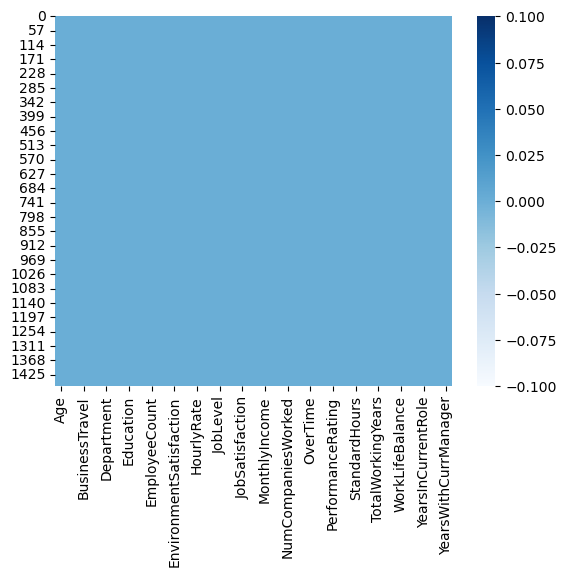

In [30]:
sns.heatmap(df.isnull(),cmap='Blues')
plt.show()

as we can see in this heatmap there is no white or any other lines are present it means we do not have the null values in this dataset

In [31]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

In [32]:
df.nunique().to_frame()

0
Age                         43
Attrition                    2
BusinessTravel               3
DailyRate                  886
Department                   3
DistanceFromHome            29
Education                    5
EducationField               6
EmployeeCount                1
EmployeeNumber            1470
EnvironmentSatisfaction      4
Gender                       2
HourlyRate                  71
JobInvolvement               4
JobLevel                     5
JobRole                      9
JobSatisfaction              4
MaritalStatus                3
MonthlyIncome             1349
MonthlyRate               1427
NumCompaniesWorked          10
Over18                       1
OverTime                     2
PercentSalaryHike           15
PerformanceRating            2
RelationshipSatisfaction     4
StandardHours                1
StockOptionLevel             4
TotalWorkingYears           40
TrainingTimesLastYear        7
WorkLifeBalance              4
YearsAtCompany              37
YearsInCurrentRole          19
YearsSinceLastPromotion     16
YearsWithCurrManager        18

In [33]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

there is not much difference between their mean value and the median('50%')

but we have strong difference between the ('75%') percentile and the ('100%') maximum value it might have some outliers in the features we will check further

# Separating dataset


In [34]:
numerical_columns=[]
categorical_columns=[]

In [35]:
for i in df.columns:
    if df.dtypes[i]=='object':
        categorical_columns.append([i])
    else :
        numerical_columns.append([i])
        
print('categorical_columns',categorical_columns)

print('\n')
print('numerical_columns',numerical_columns)


categorical_columns [['Attrition'], ['BusinessTravel'], ['Department'], ['EducationField'], ['Gender'], ['JobRole'], ['MaritalStatus'], ['Over18'], ['OverTime']]


numerical_columns [['Age'], ['DailyRate'], ['DistanceFromHome'], ['Education'], ['EmployeeCount'], ['EmployeeNumber'], ['EnvironmentSatisfaction'], ['HourlyRate'], ['JobInvolvement'], ['JobLevel'], ['JobSatisfaction'], ['MonthlyIncome'], ['MonthlyRate'], ['NumCompaniesWorked'], ['PercentSalaryHike'], ['PerformanceRating'], ['RelationshipSatisfaction'], ['StandardHours'], ['StockOptionLevel'], ['TotalWorkingYears'], ['TrainingTimesLastYear'], ['WorkLifeBalance'], ['YearsAtCompany'], ['YearsInCurrentRole'], ['YearsSinceLastPromotion'], ['YearsWithCurrManager']]


# Exploratory data analysis (EDA)

Univariate

In [36]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

<Axes: xlabel='Age', ylabel='Density'>

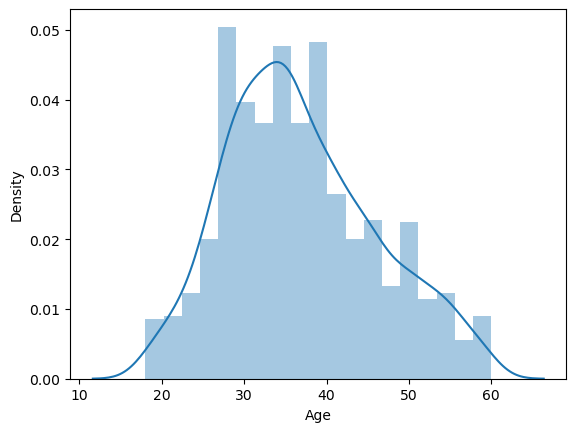

In [37]:
sns.distplot(df['Age'])


in the above distplot ('Age') frequency is high between 28 to 40 it means most of our employee they are in this age criteria

No     1233
Yes     237
Name: Attrition, dtype: int64


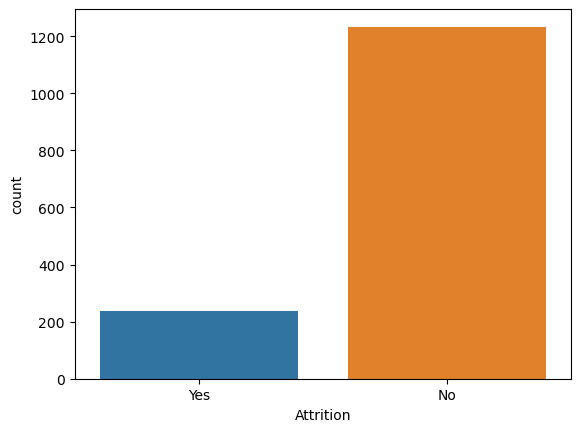

In [38]:
print(df['Attrition'].value_counts())
sns.countplot(x='Attrition',data=df)
plt.show()

the attrition rate is not that much high it is good for the company

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


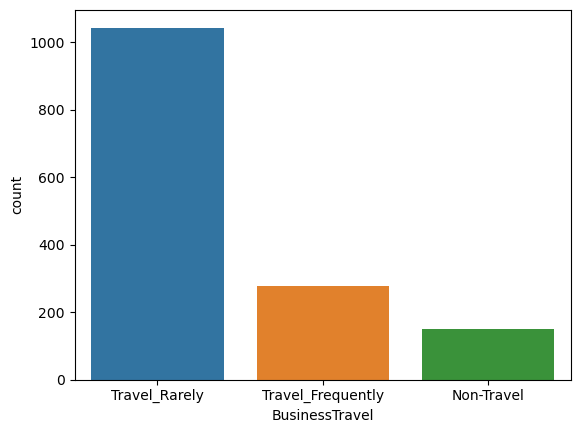

In [39]:
print(df['BusinessTravel'].value_counts())
sns.countplot(x='BusinessTravel',data=df)
plt.show()

the ('Travel_Rarely') count  is high than the ('Travel_Frequently BusinessTravel','Non-Travel') count

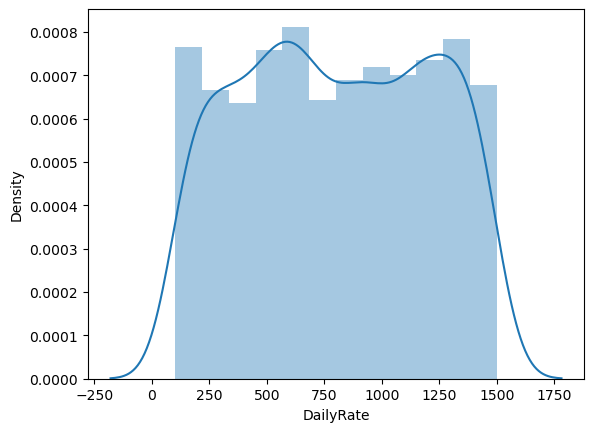

In [40]:
sns.distplot(df['DailyRate'])
plt.show()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


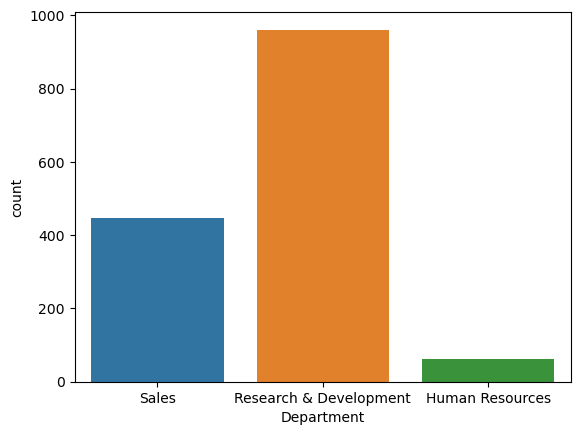

In [41]:
print(df['Department'].value_counts())
sns.countplot(x='Department',data=df)
plt.show()

most of the employee working in the ('Research & Development Department') into the company that.s why in the countplot the count is high of this Department

0        1
1        8
2        2
3        3
4        2
        ..
1465    23
1466     6
1467     4
1468     2
1469     8
Name: DistanceFromHome, Length: 1470, dtype: int64


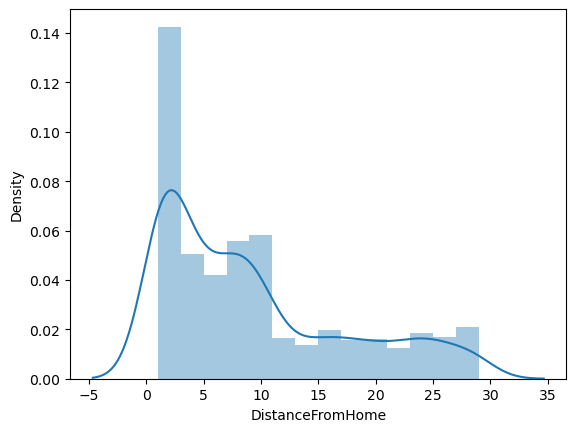

In [42]:
print(df['DistanceFromHome'])
sns.distplot(df['DistanceFromHome'])
plt.show()

in the ('DistanceFromHome') frequency is high between 1 to 3

In [43]:
df.head(3)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  

[3 rows x 35 columns]

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
Axes(0.125,0.11;0.775x0.77)


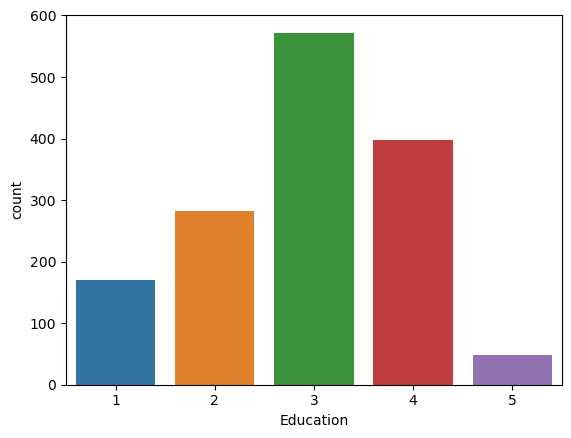

In [44]:
print(df['Education'].value_counts())
print(sns.countplot(x='Education',data=df))
plt.show()

('Education') level 3 and 4 count is  high then the other levels

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


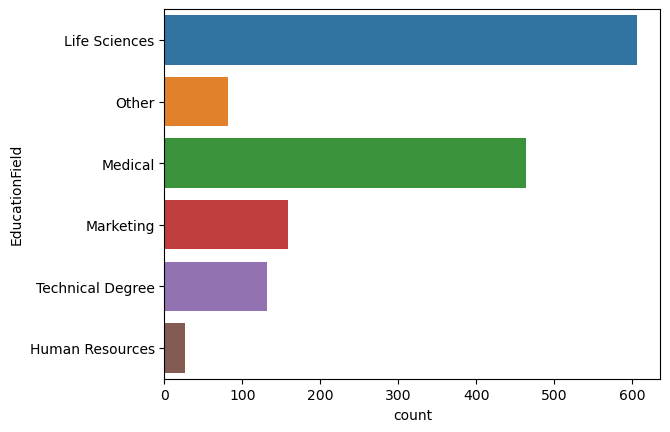

In [45]:
print(df['EducationField'].value_counts())
sns.countplot(y='EducationField',data=df)
plt.show()

in the ('EducationField') the count is high of ('Life Scinces','medical') than the other remaining feature

In [46]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

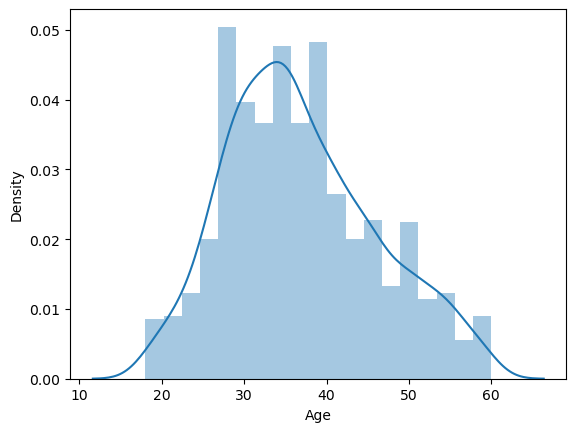

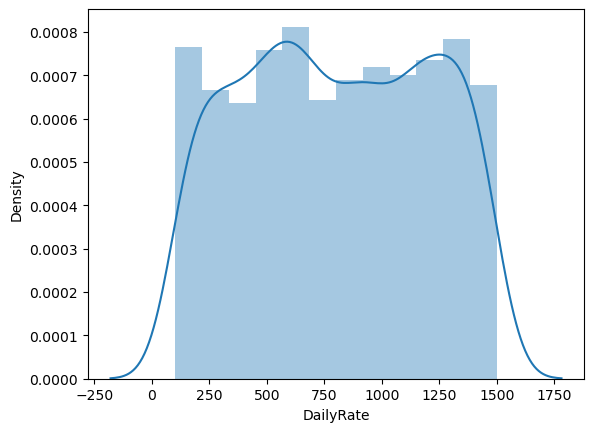

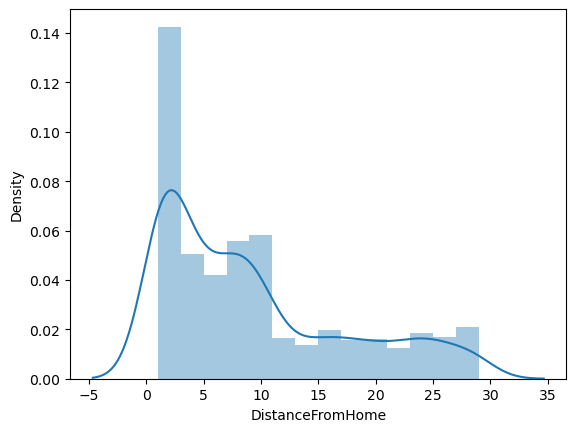

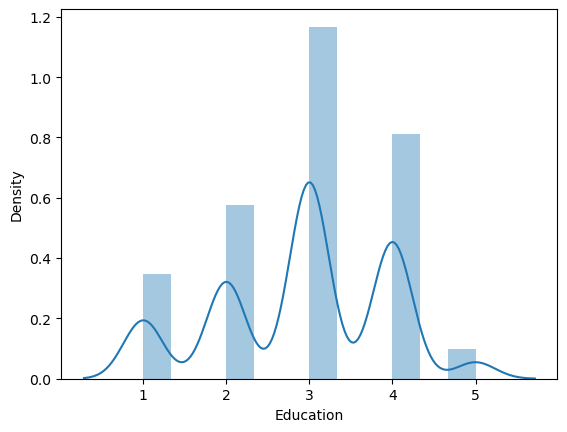

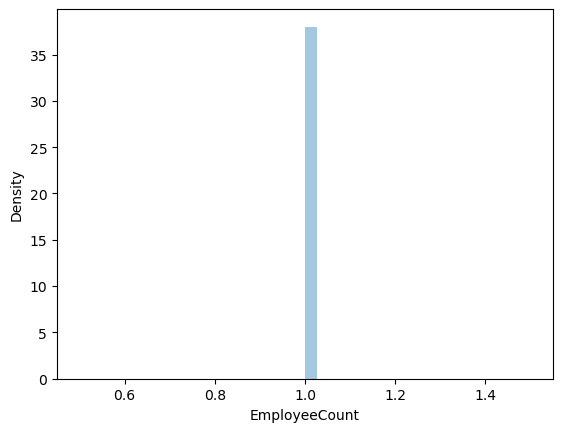

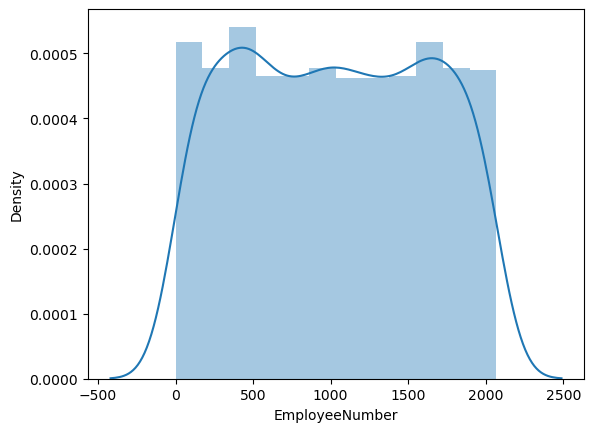

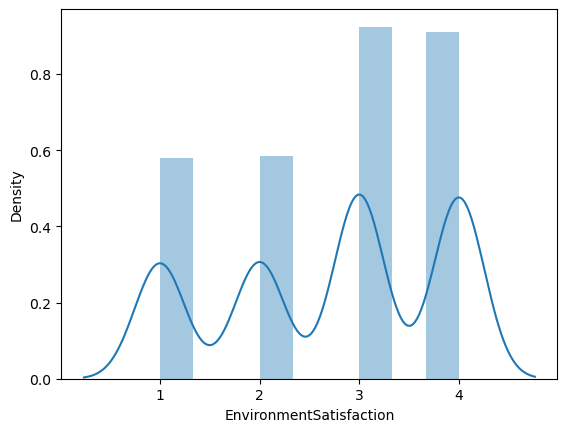

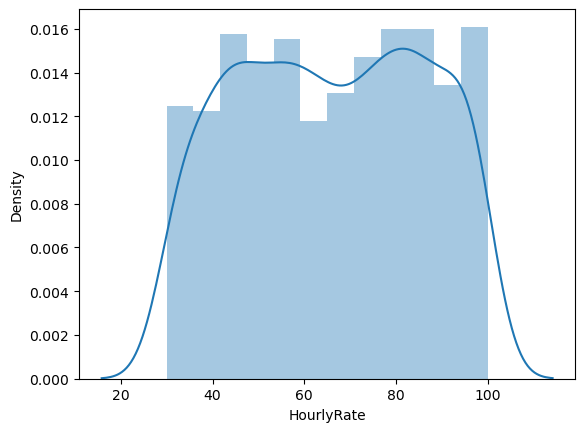

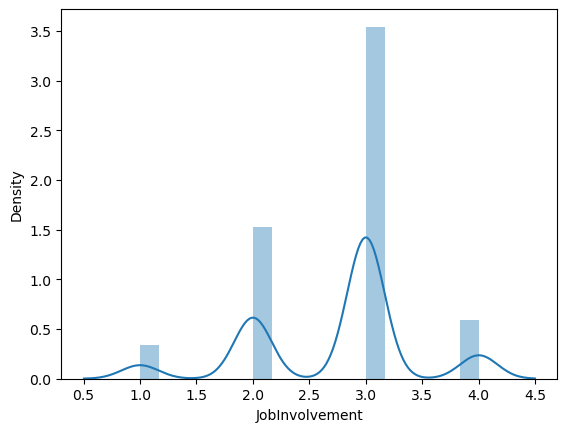

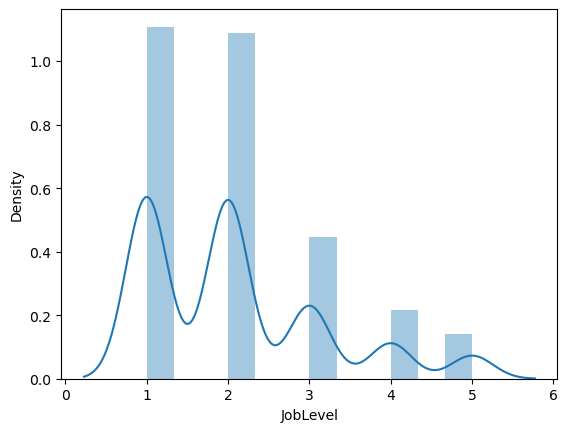

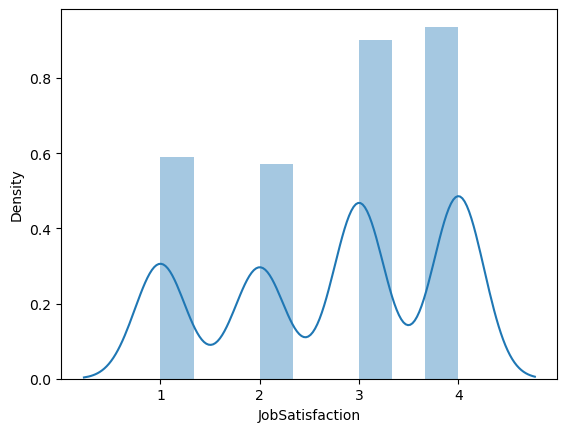

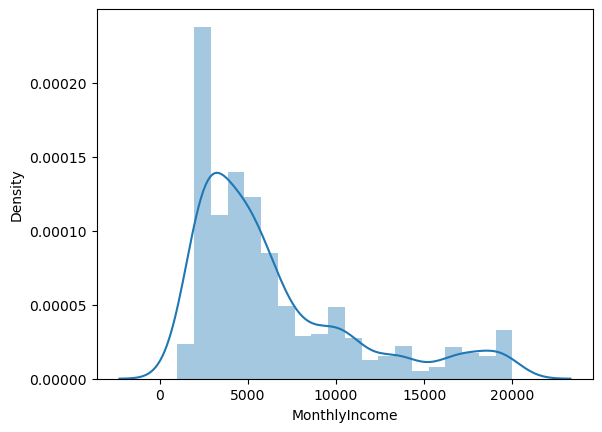

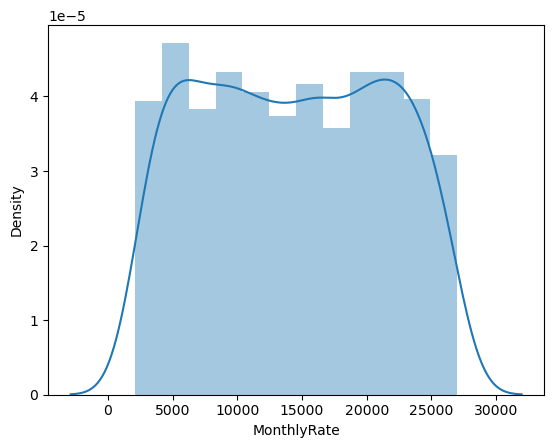

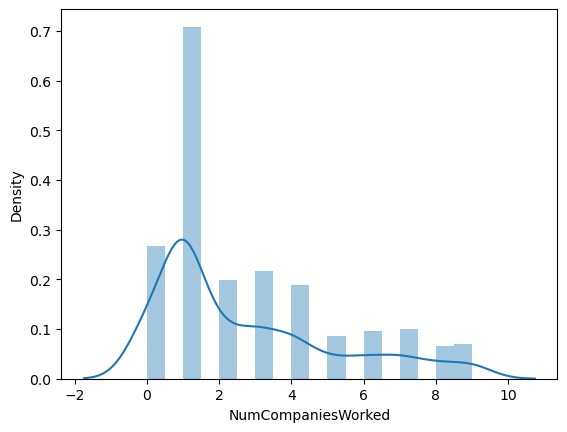

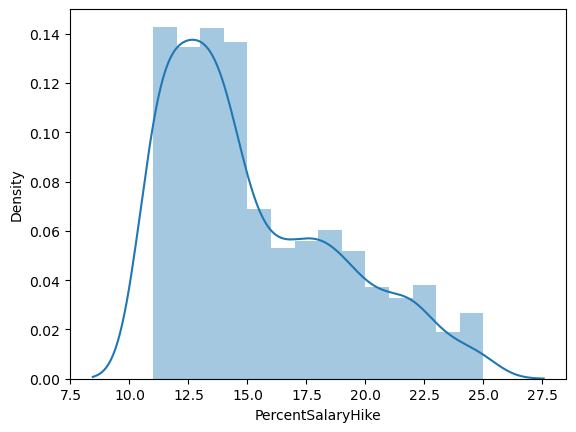

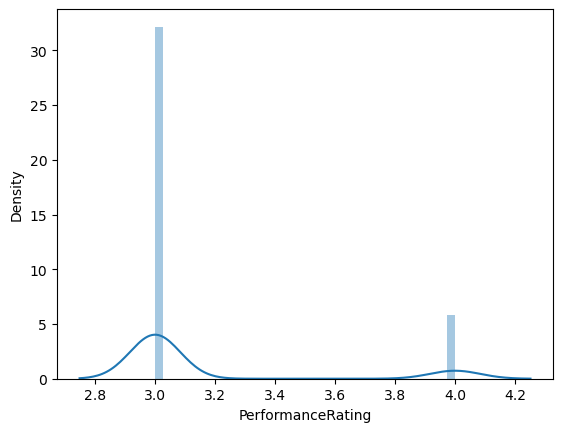

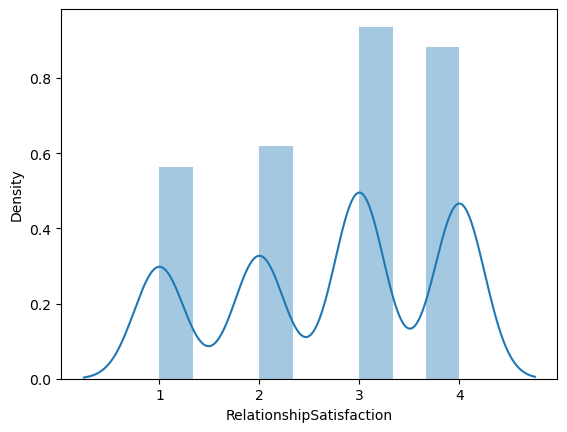

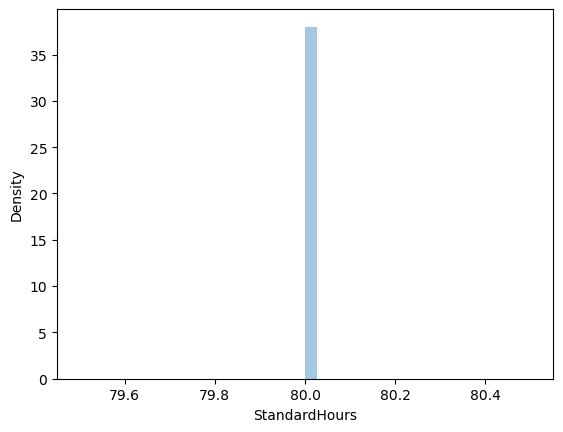

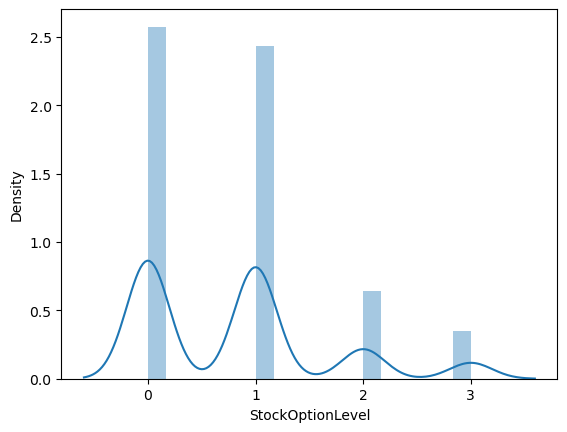

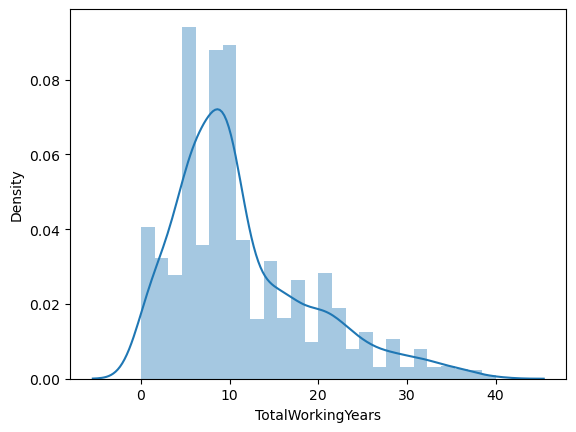

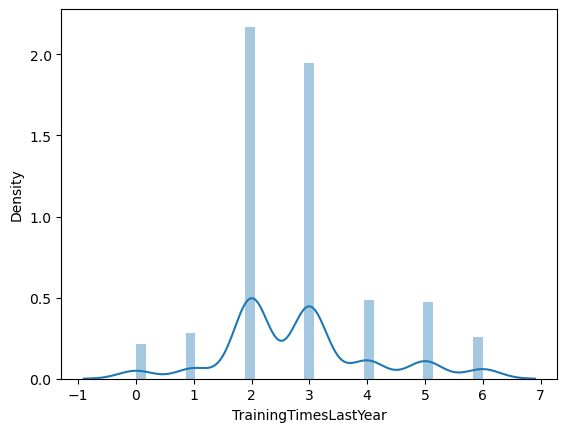

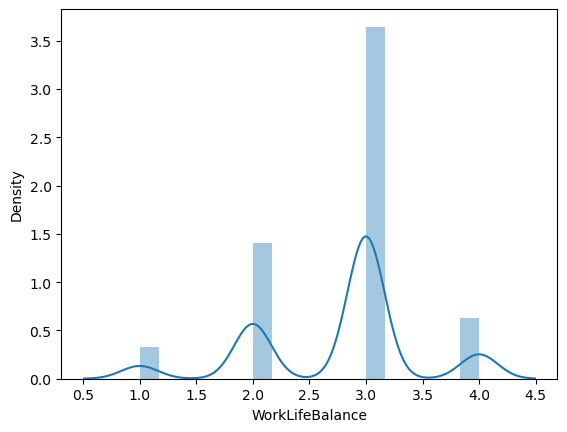

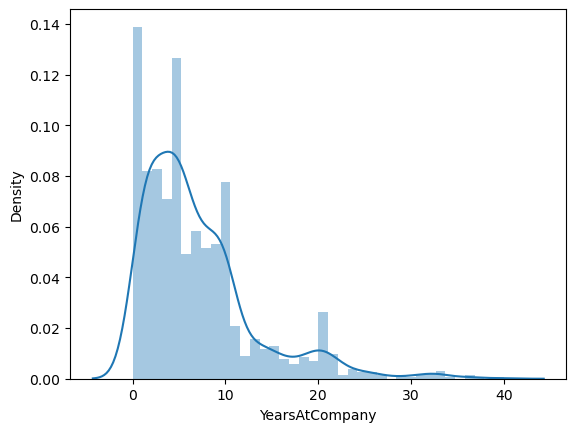

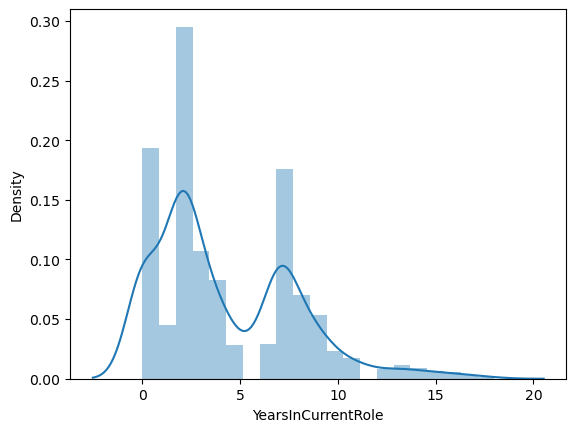

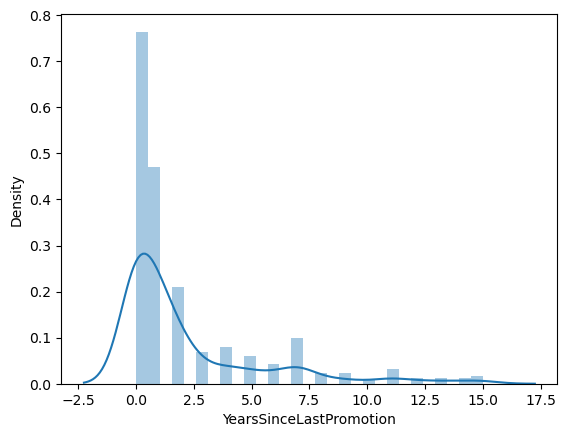

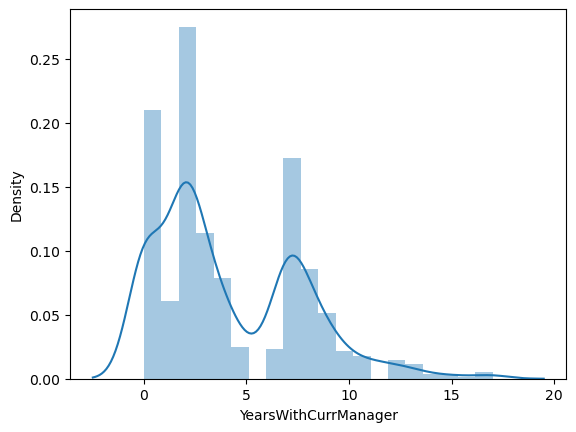

In [47]:
for i in df.columns:
    if df.dtypes[i]!='object':
        sns.distplot(df[i])
        plt.show()

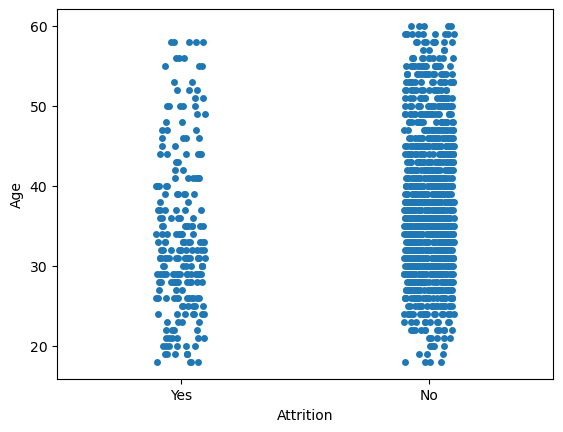

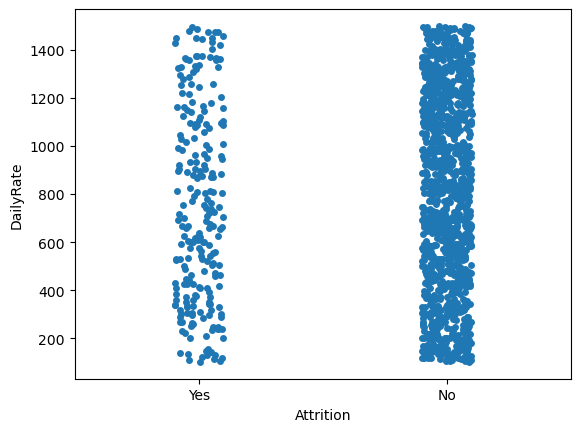

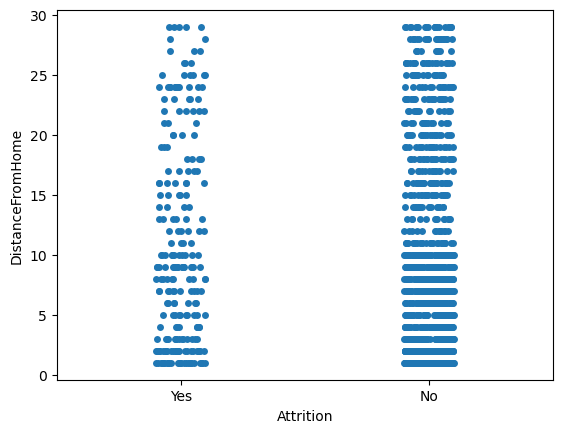

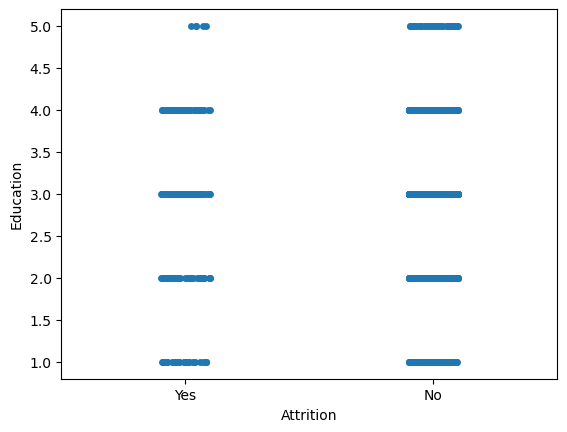

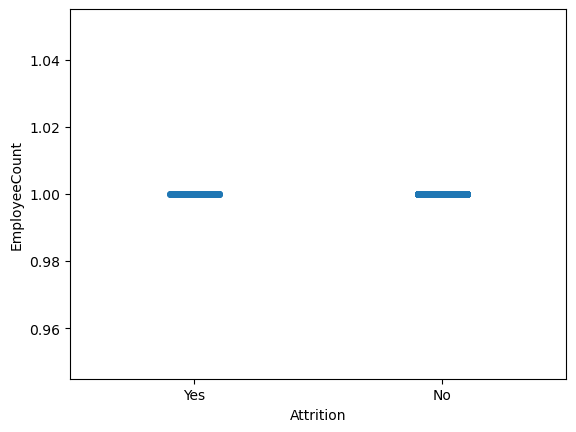

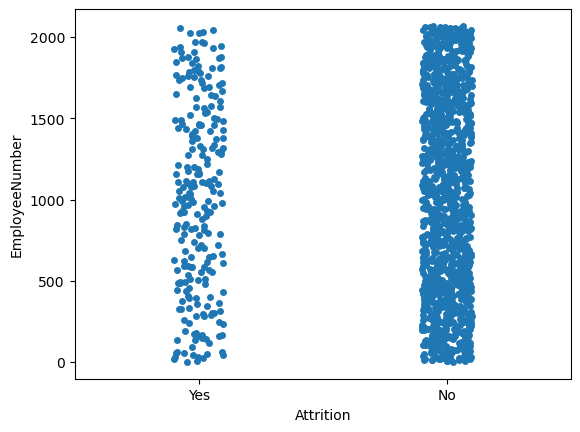

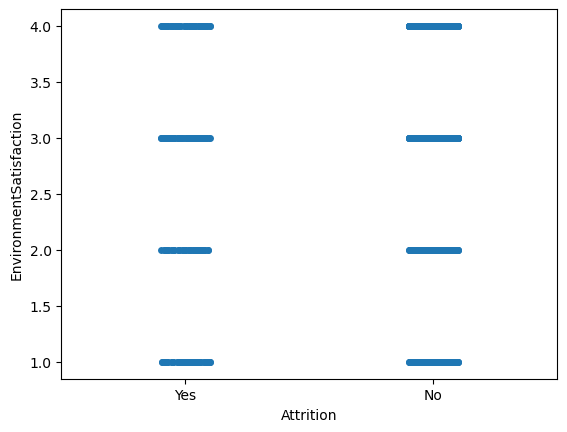

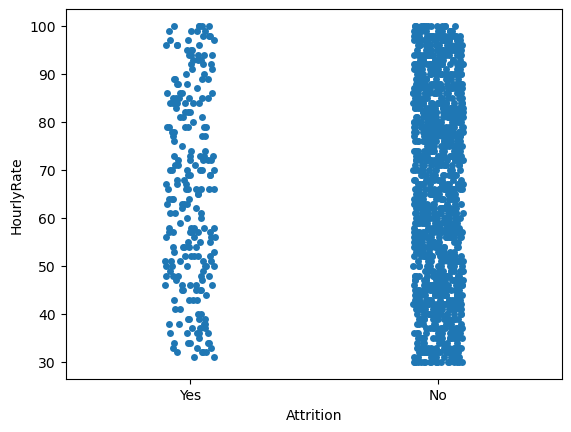

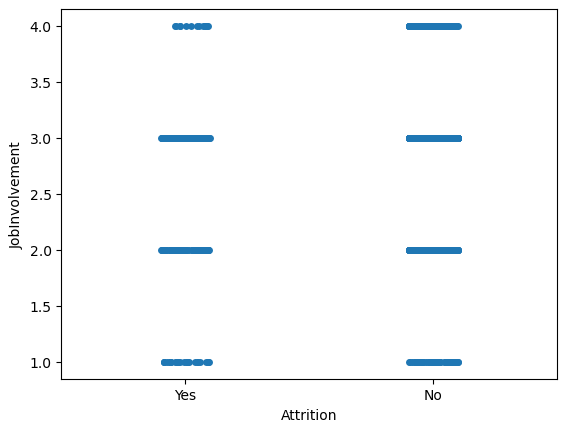

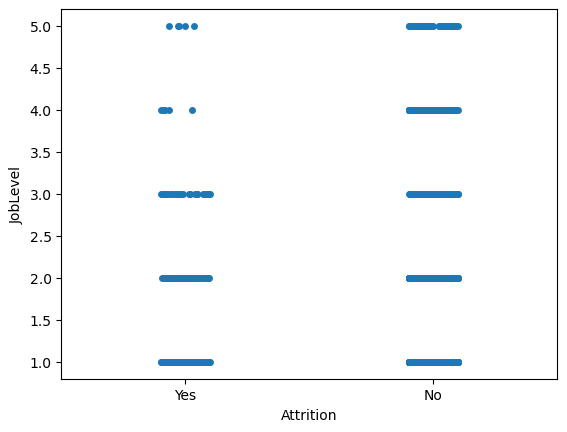

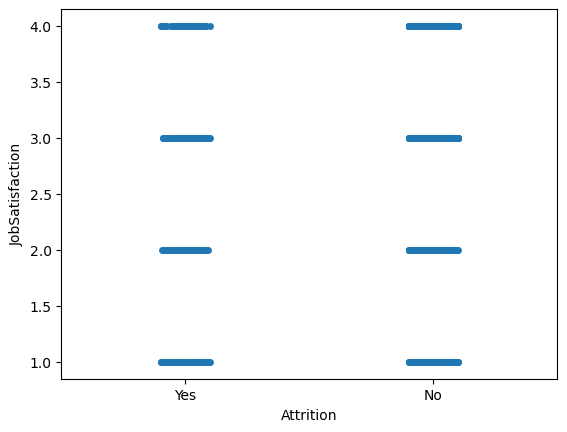

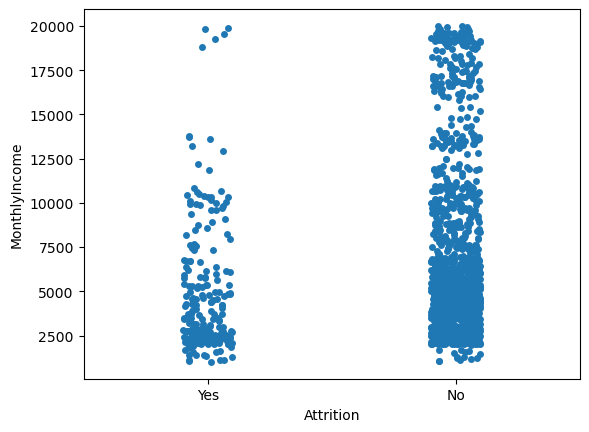

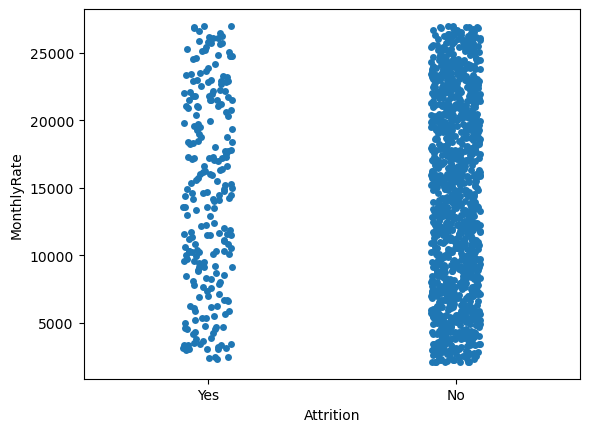

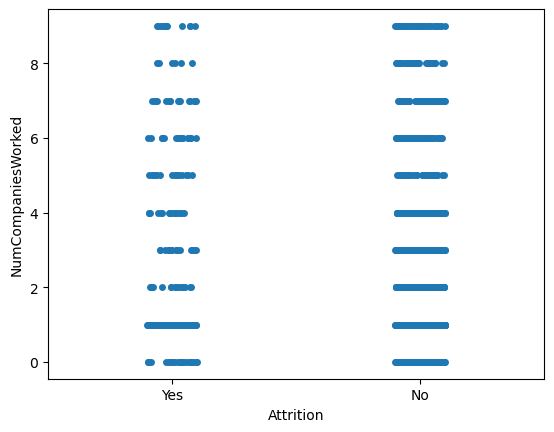

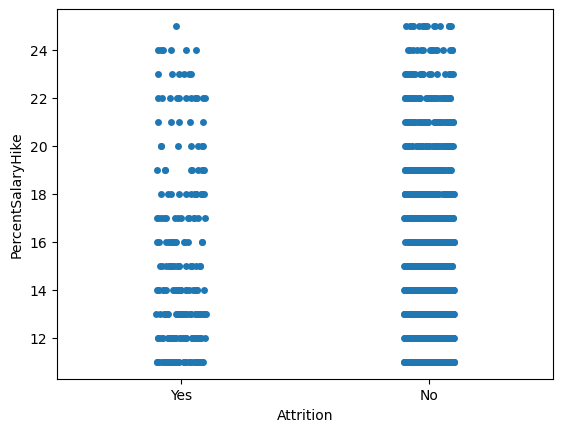

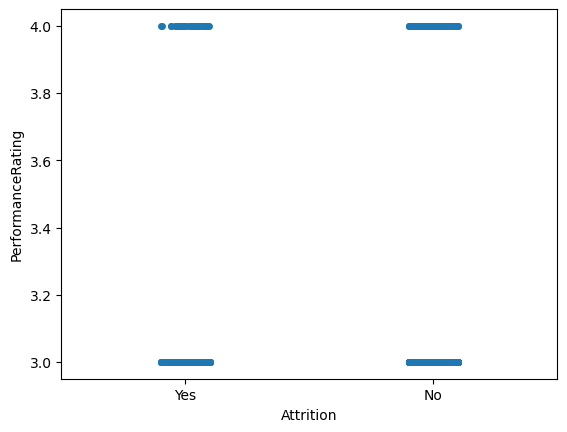

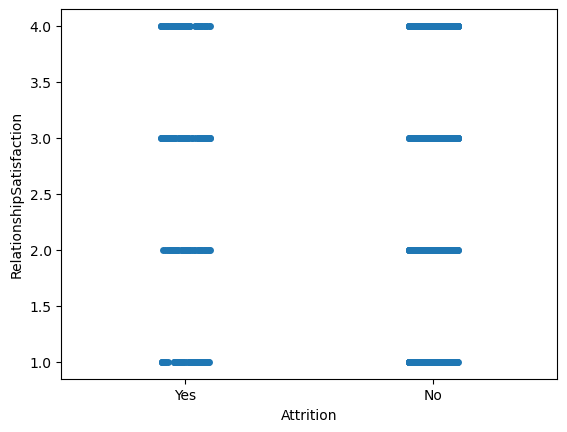

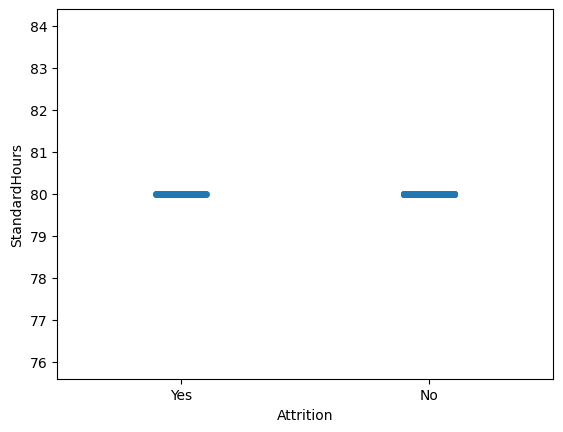

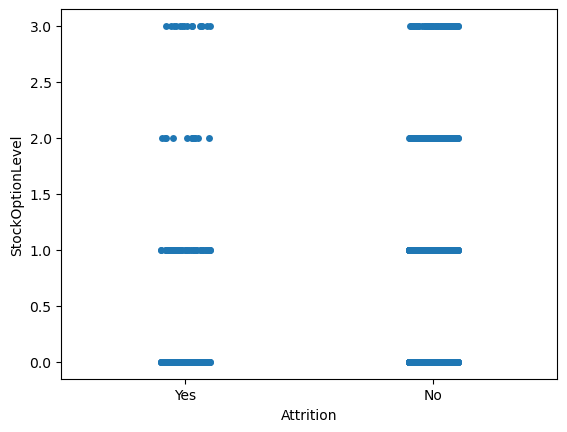

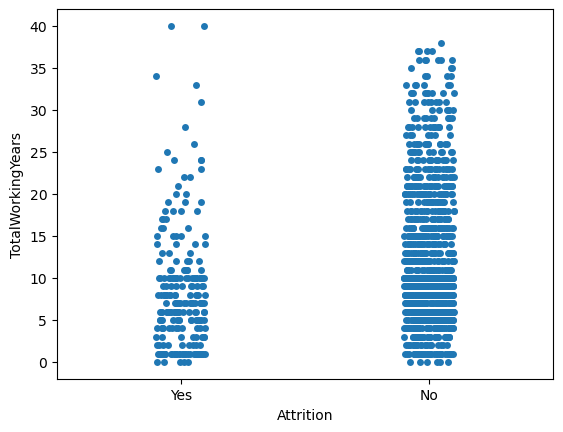

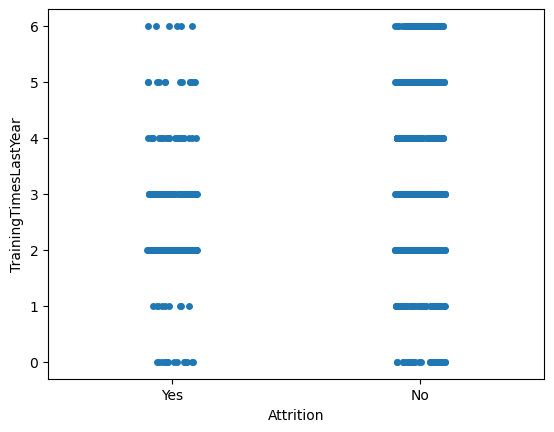

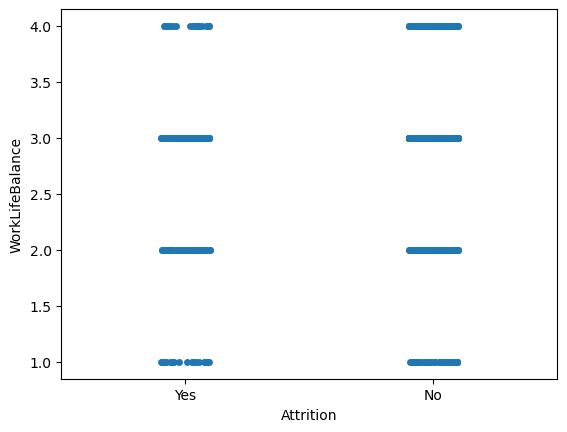

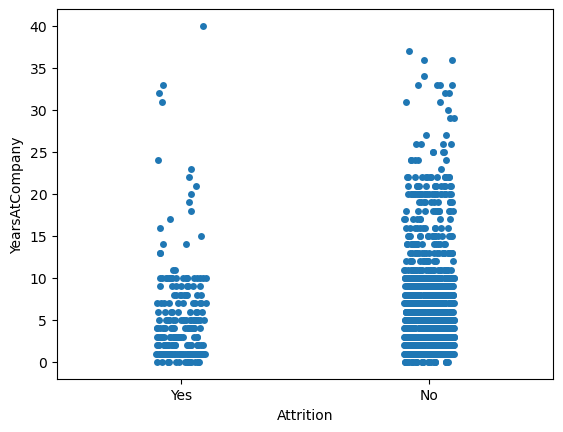

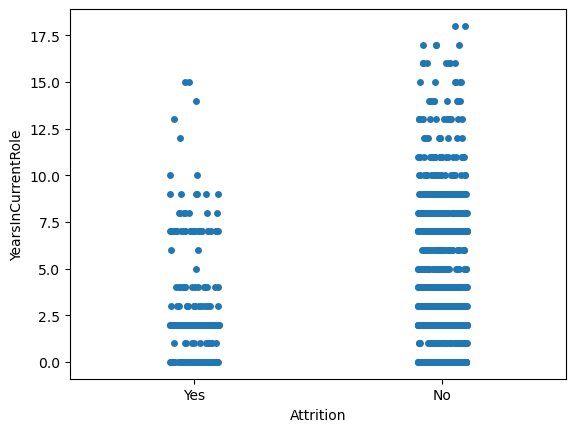

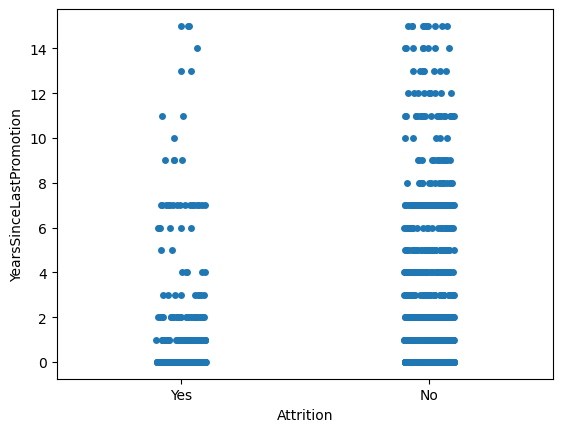

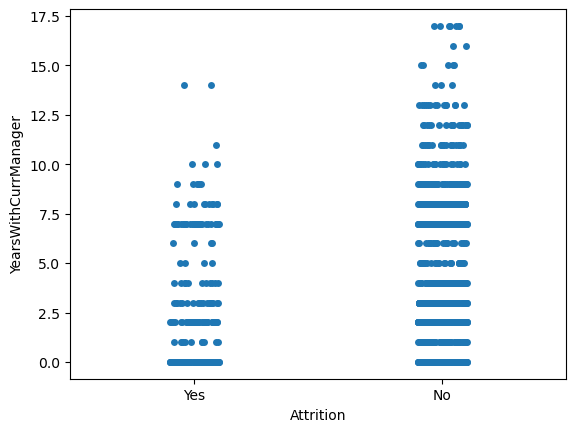

In [48]:
for i in df.columns:
    if df.dtypes[i]!='object':
        sns.stripplot(x='Attrition',y=i,data=df)
        plt.show()

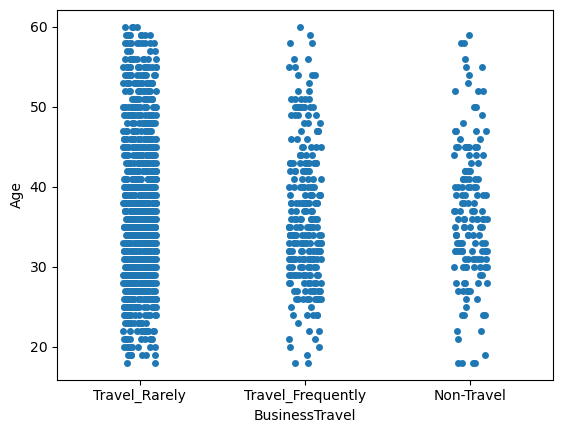

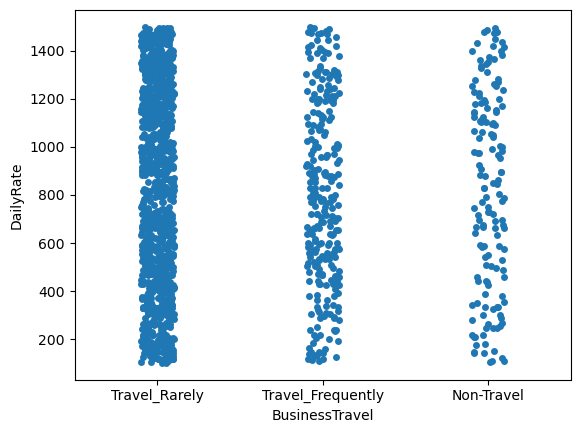

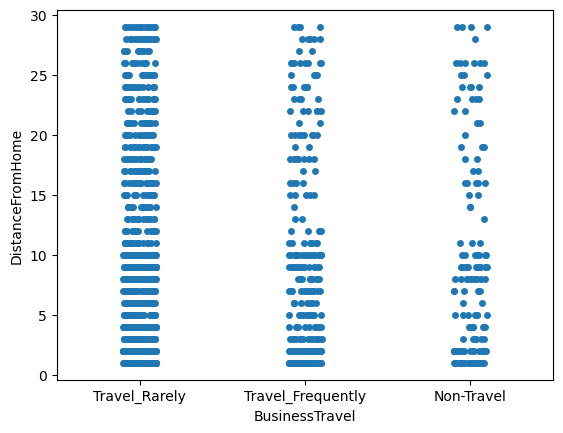

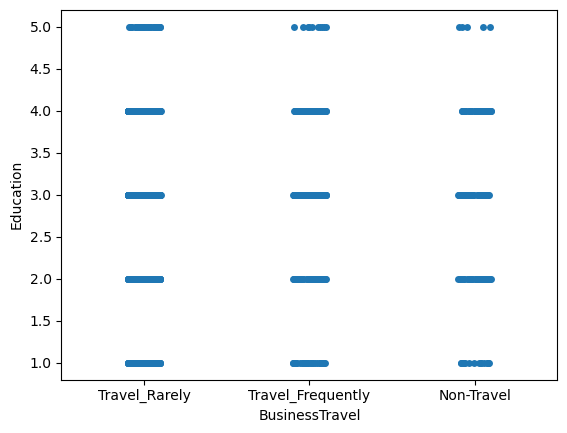

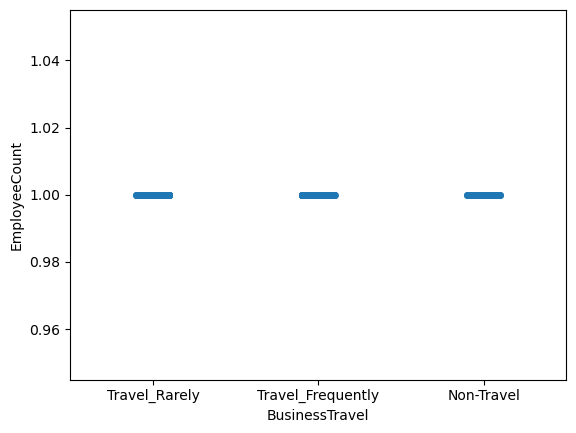

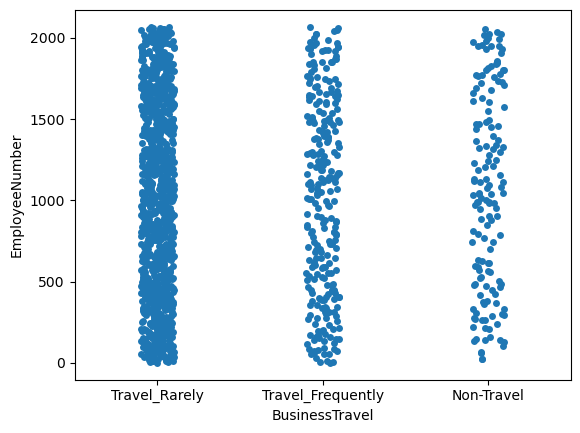

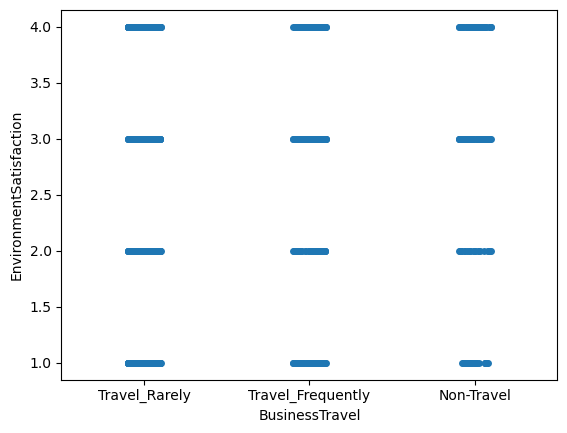

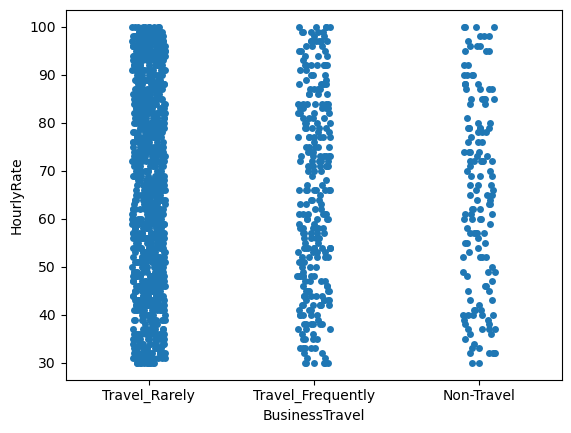

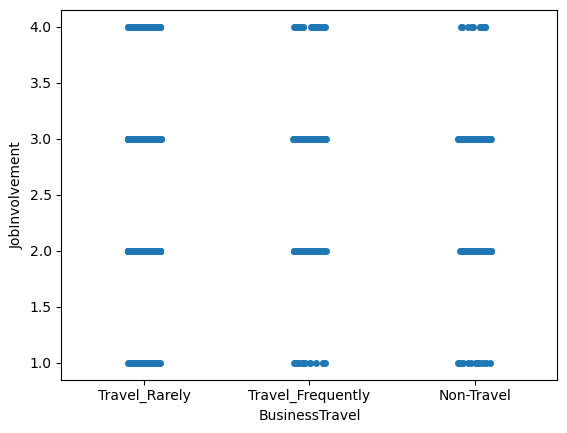

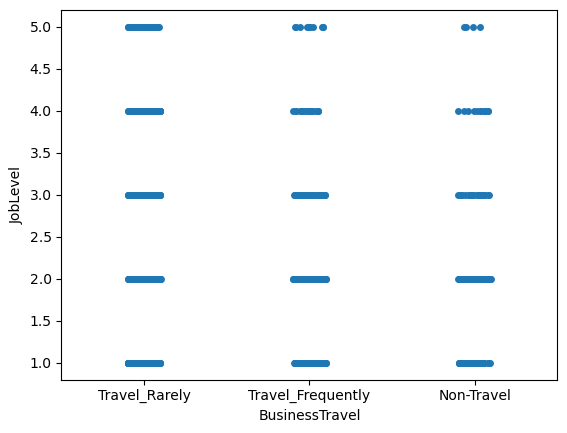

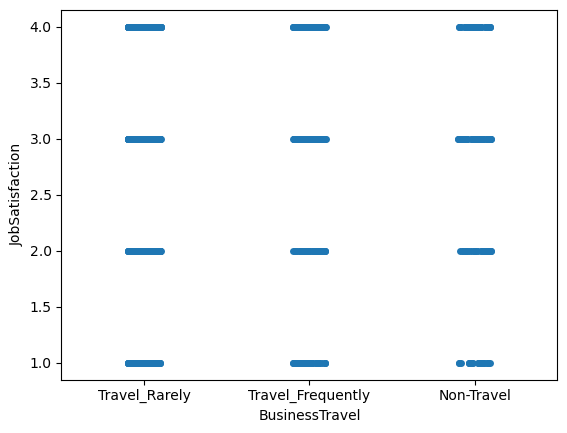

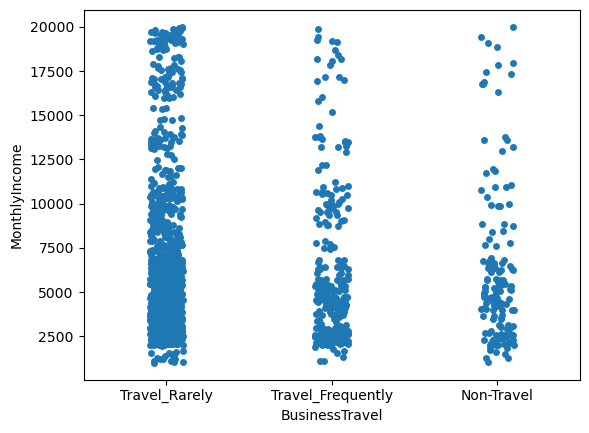

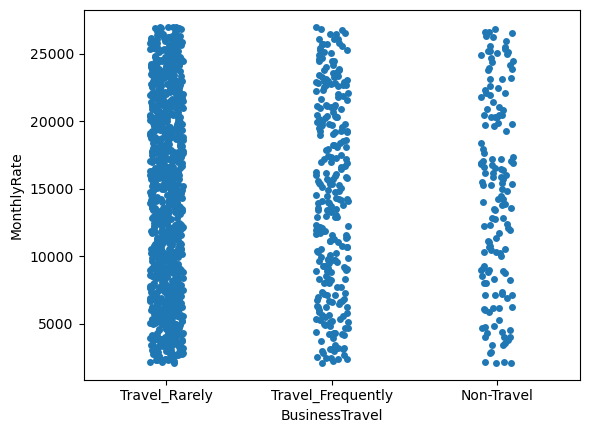

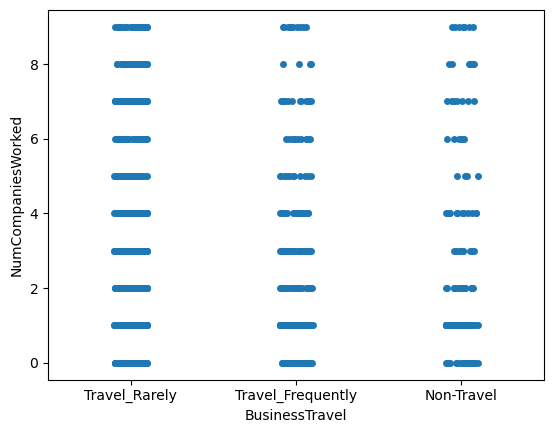

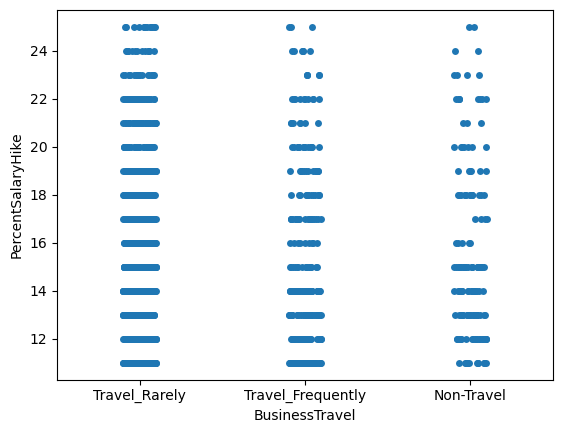

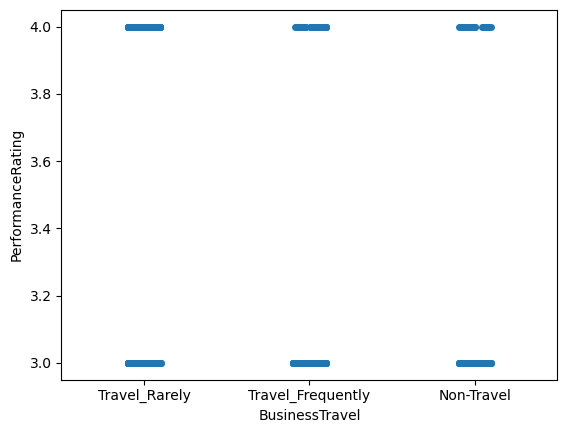

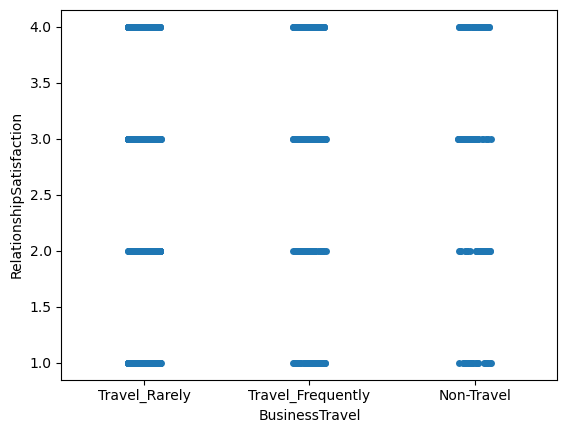

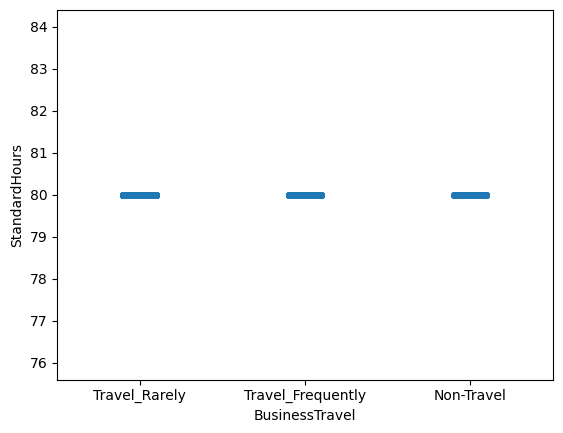

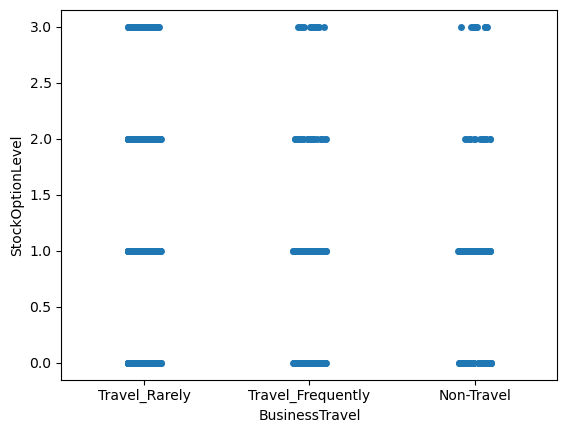

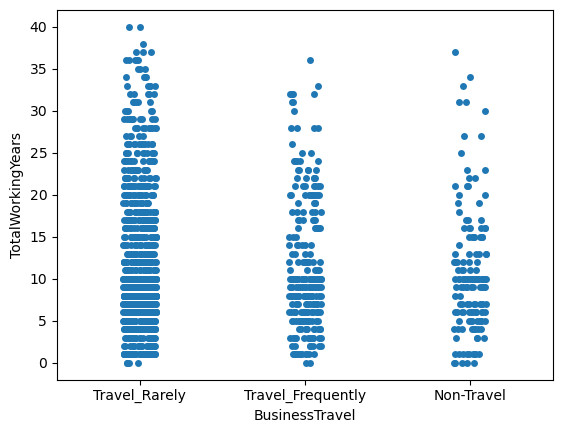

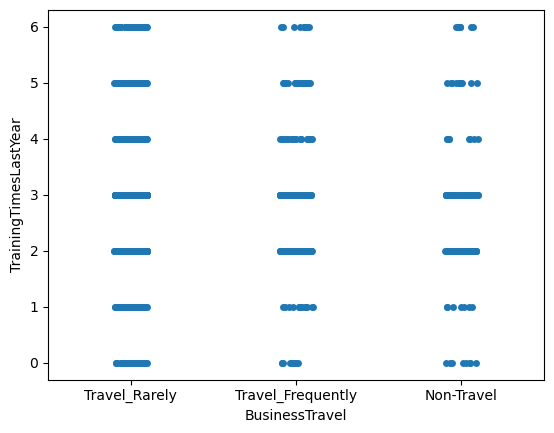

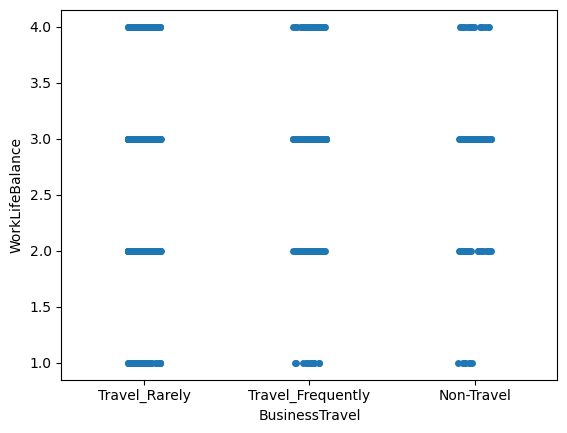

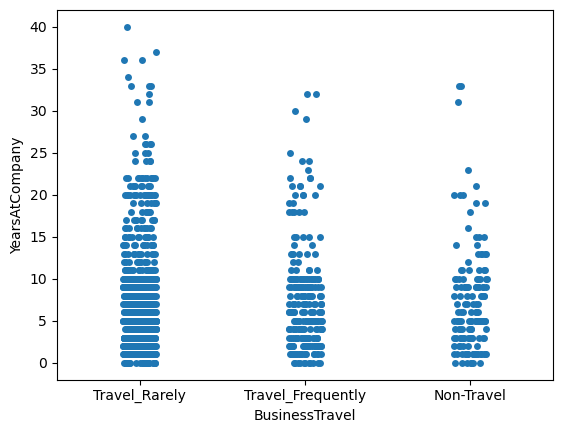

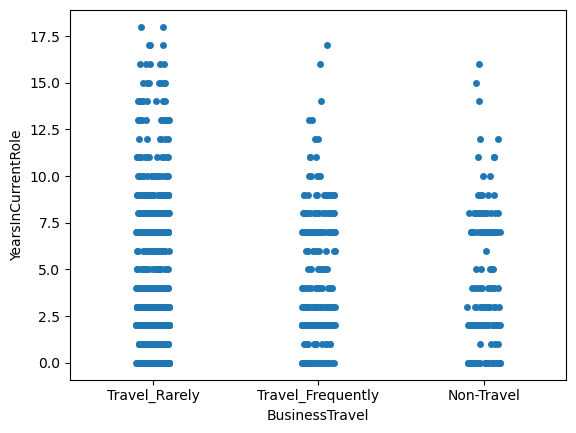

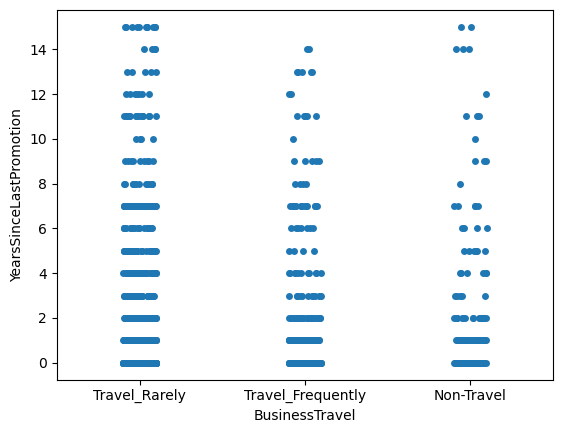

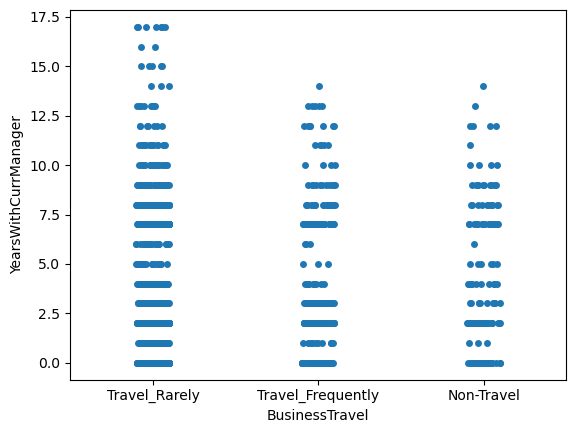

In [49]:
for i in df.columns:
    if df.dtypes[i]!='object':
        sns.stripplot(x='BusinessTravel',y=i,data=df)
        plt.show()

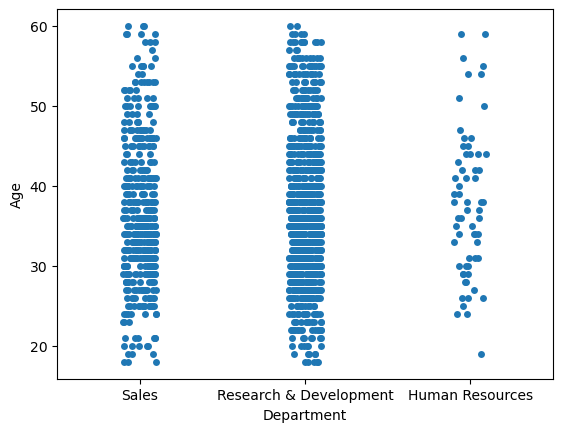

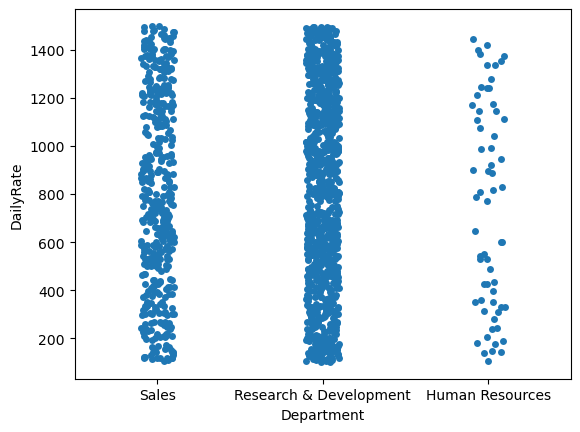

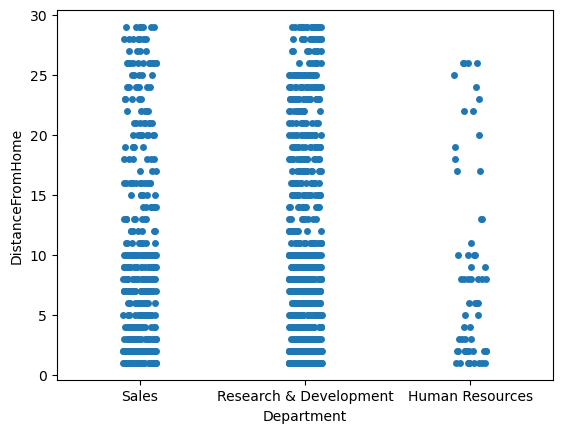

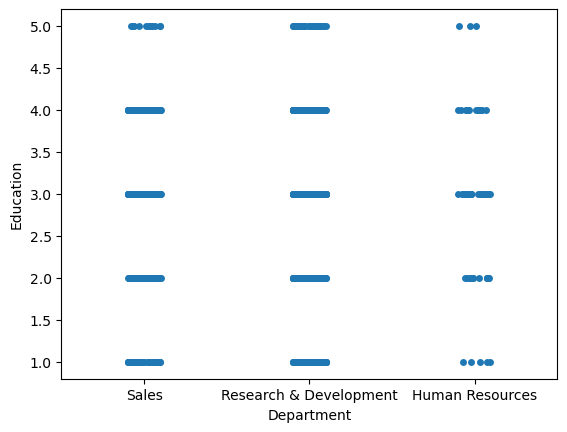

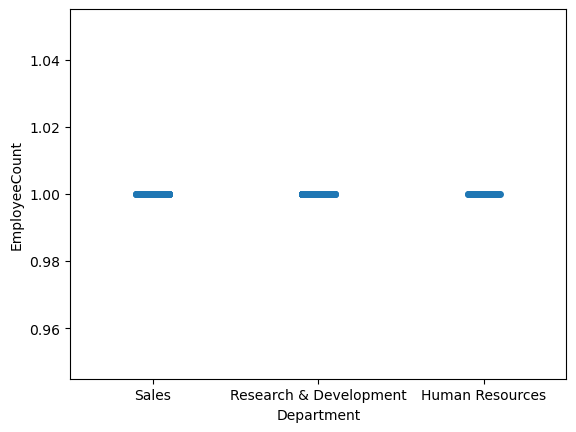

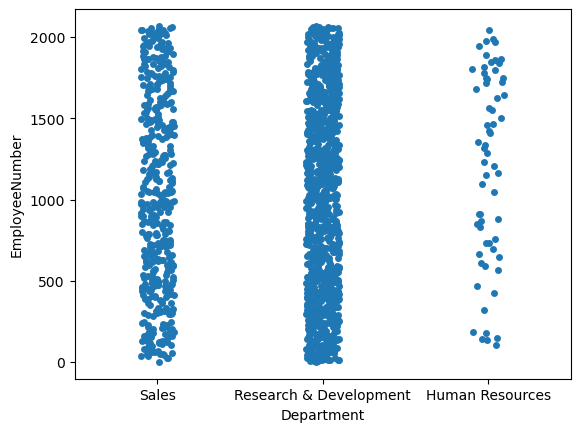

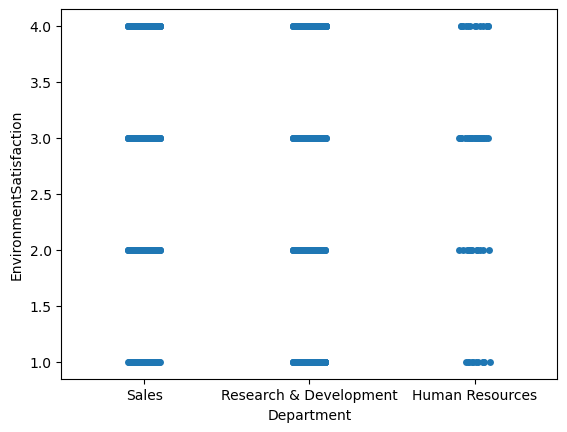

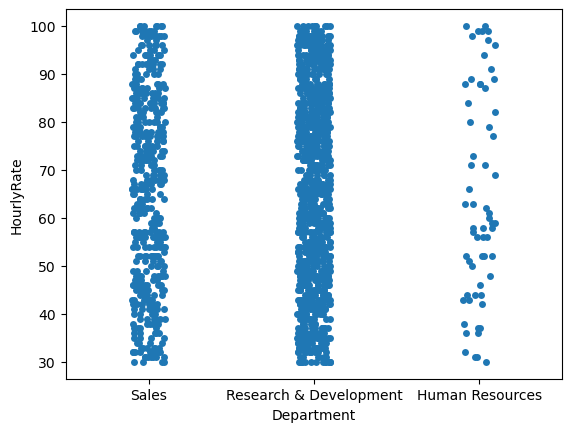

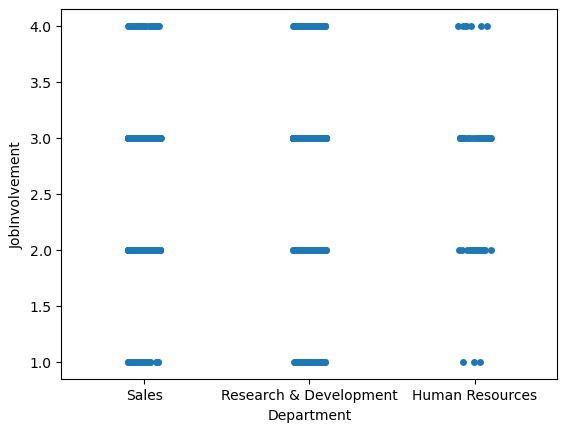

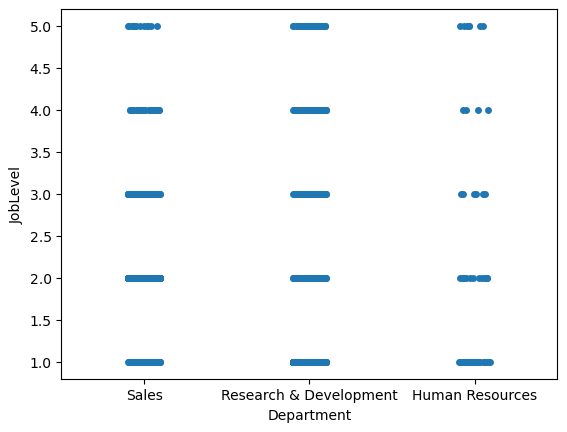

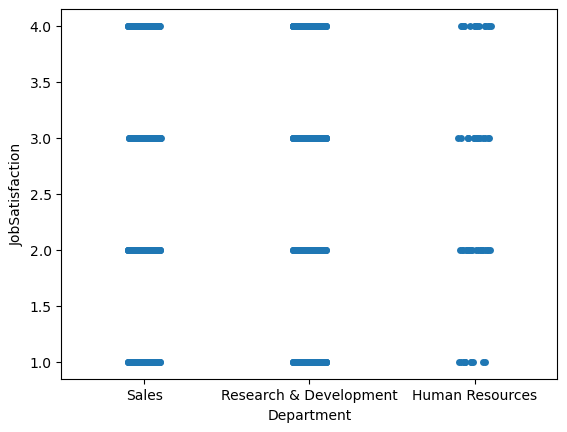

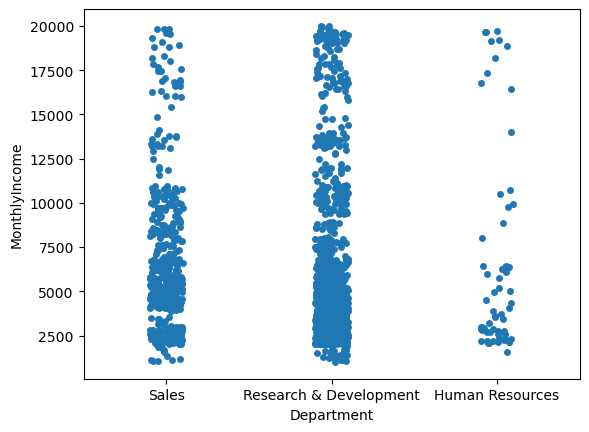

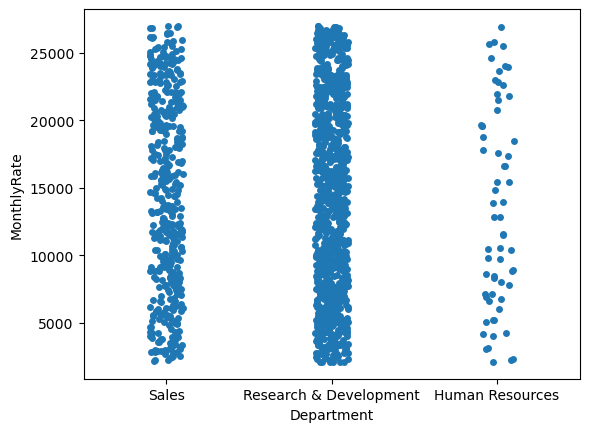

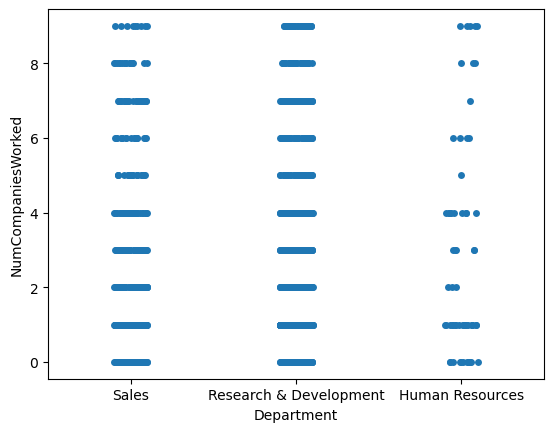

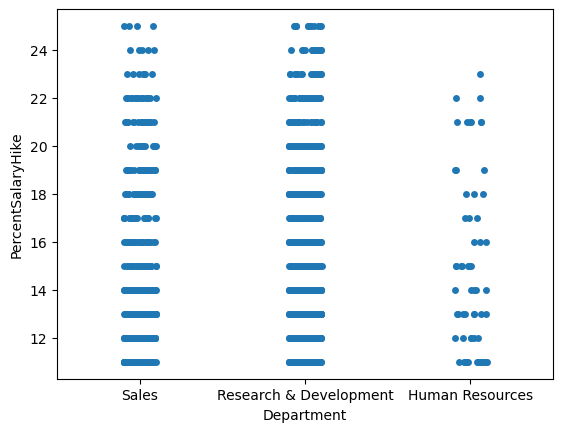

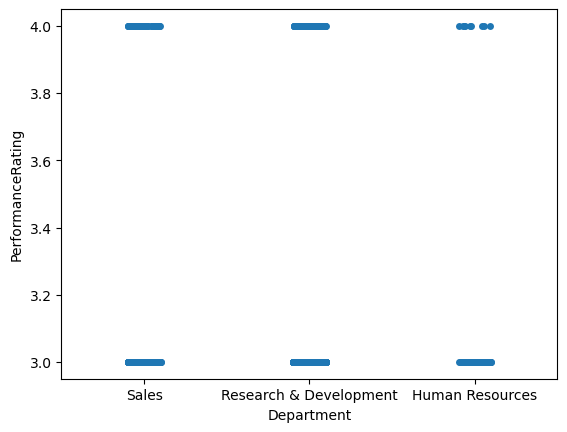

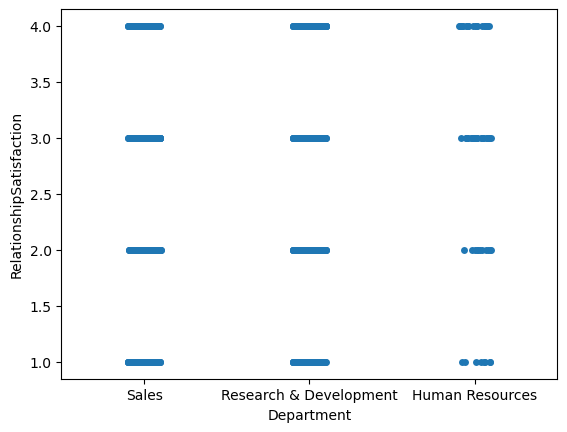

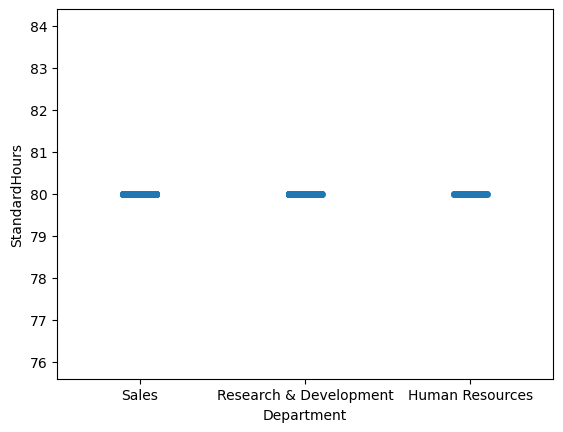

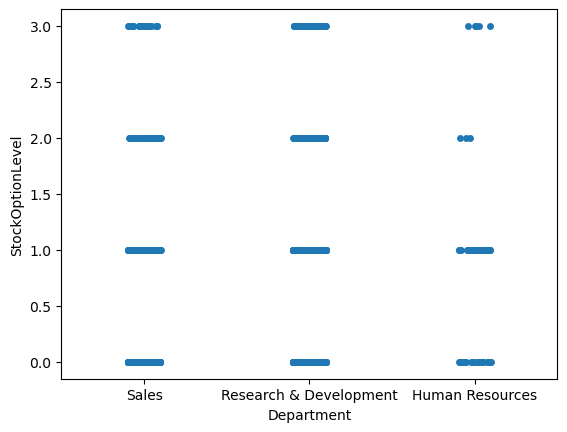

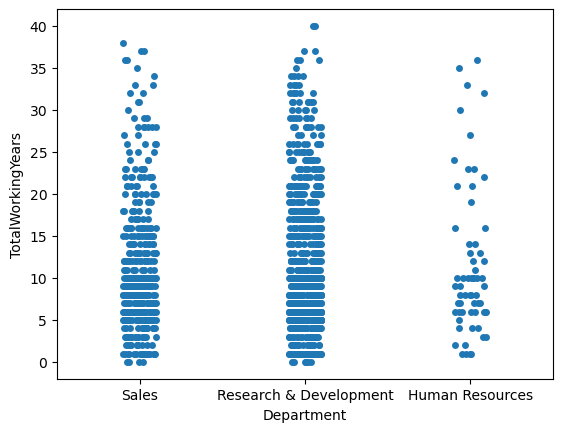

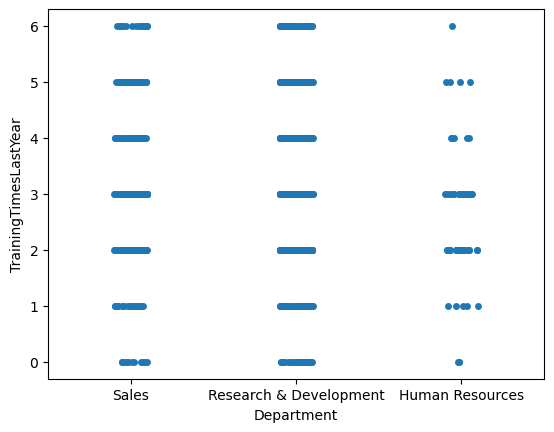

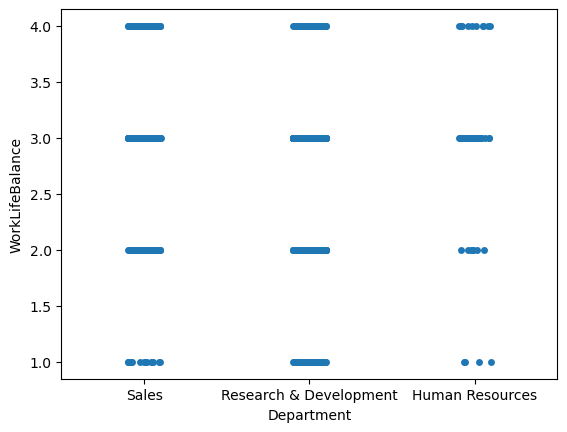

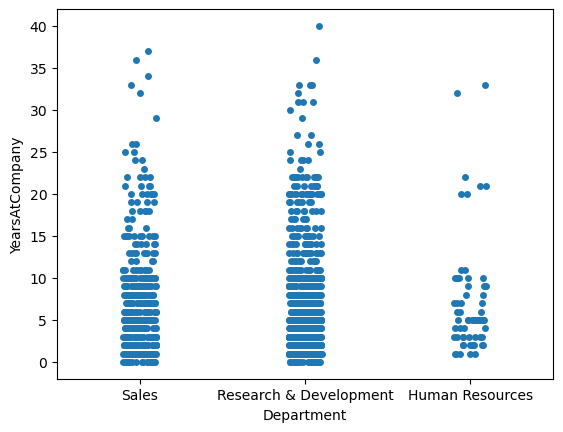

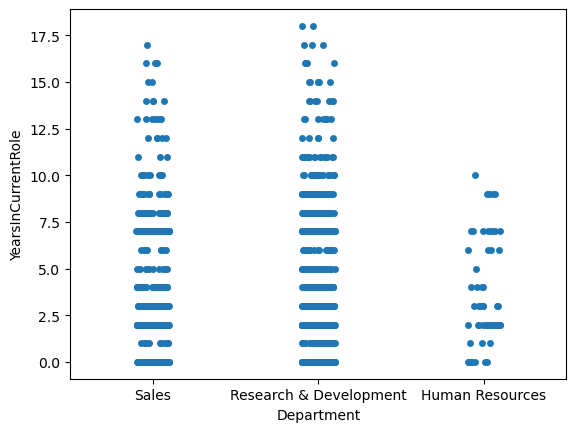

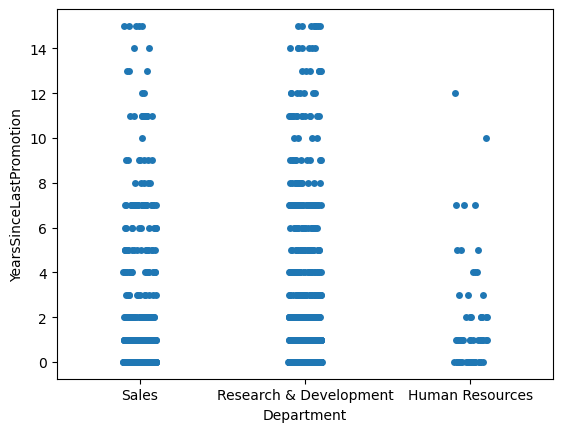

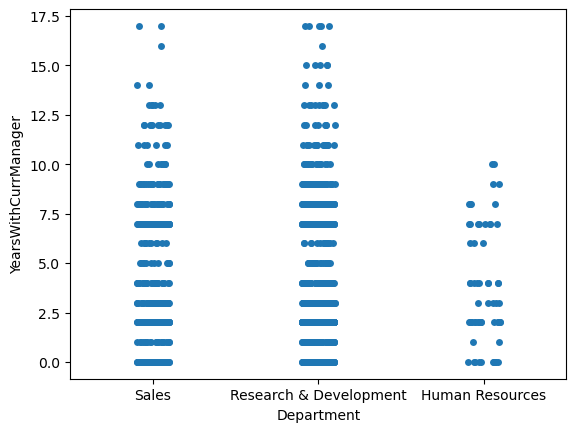

In [50]:
for i in df.columns:
    if df.dtypes[i]!='object':
        sns.stripplot(x='Department',y=i,data=df)
        plt.show()

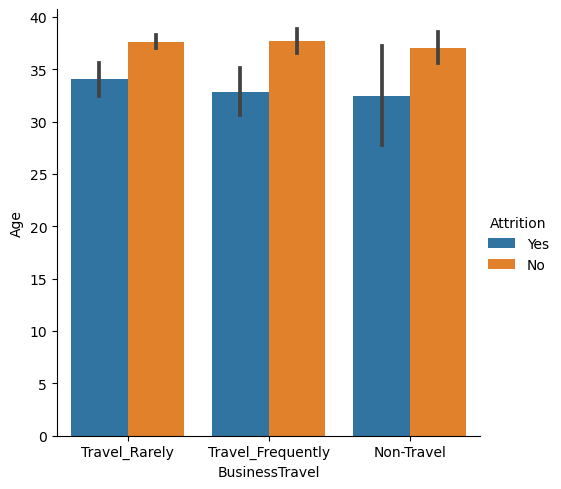

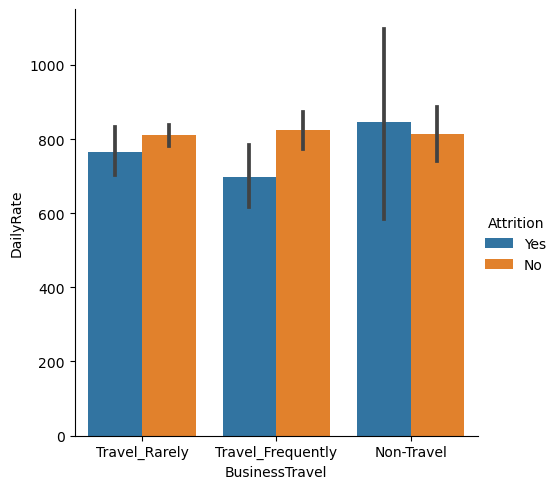

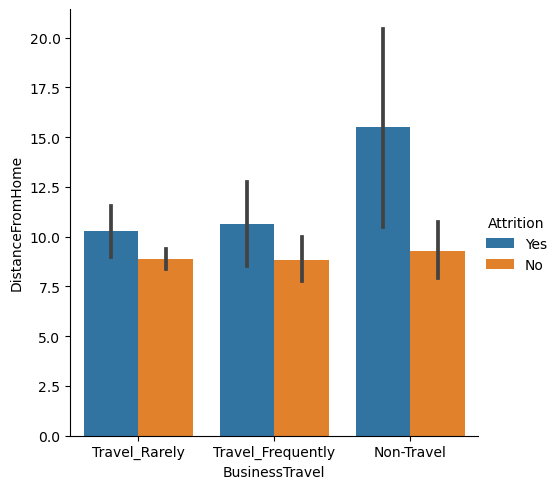

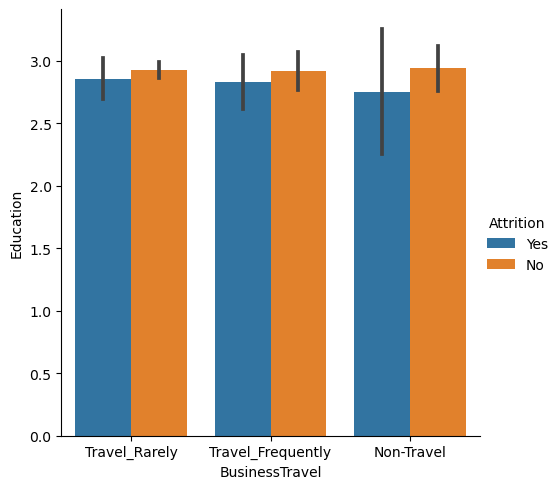

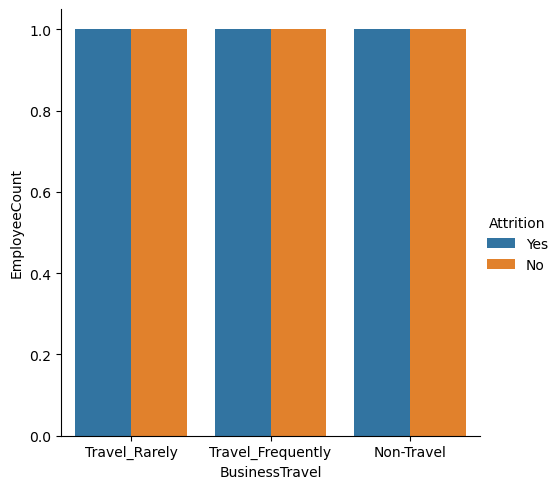

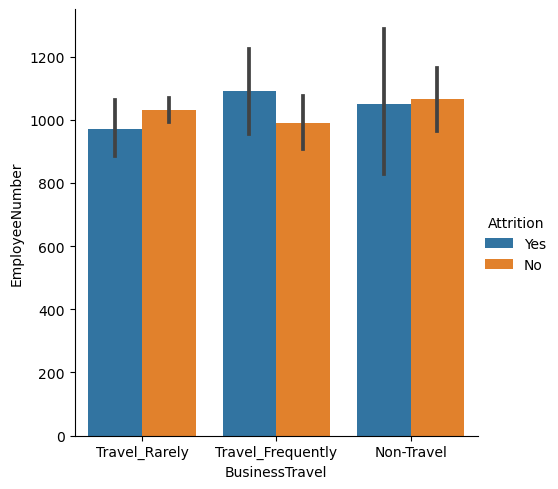

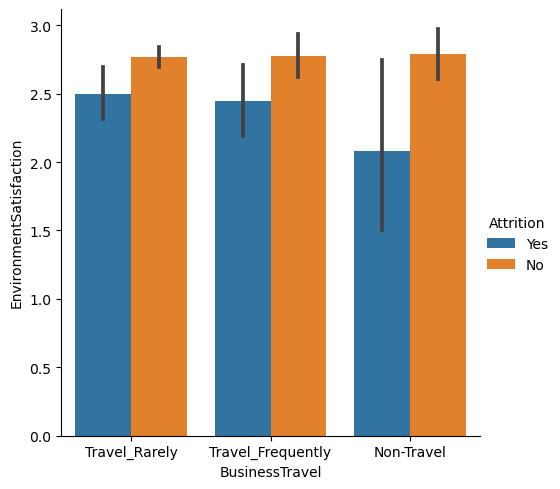

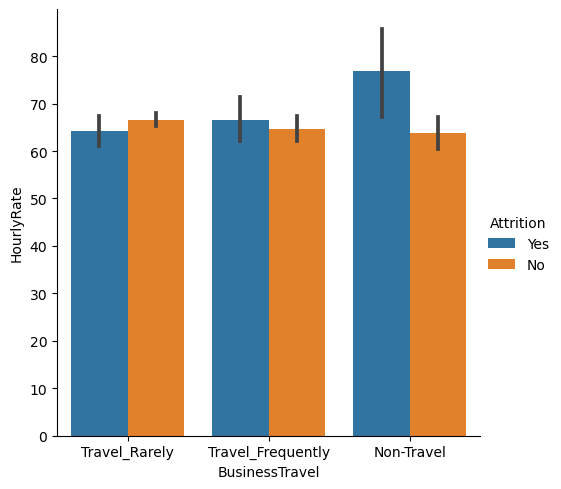

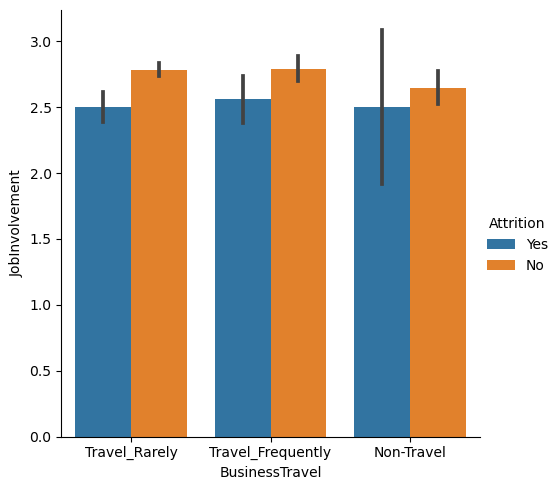

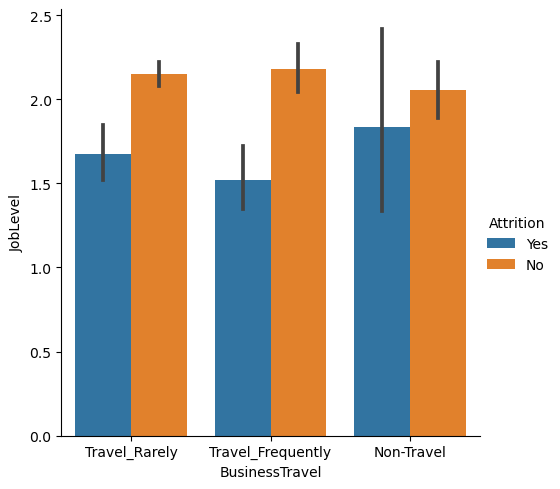

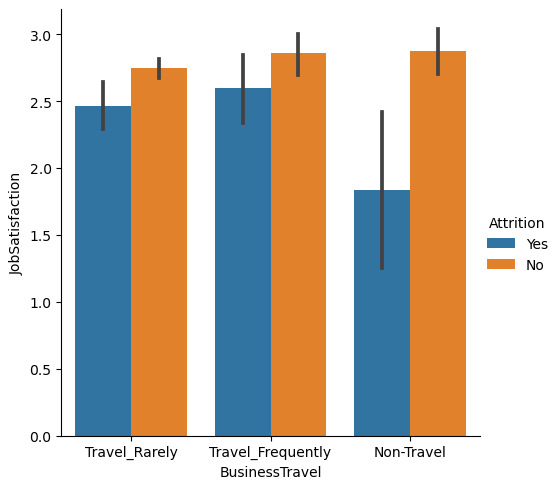

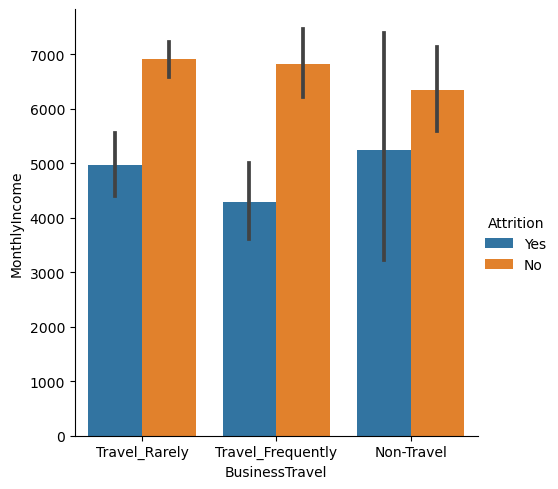

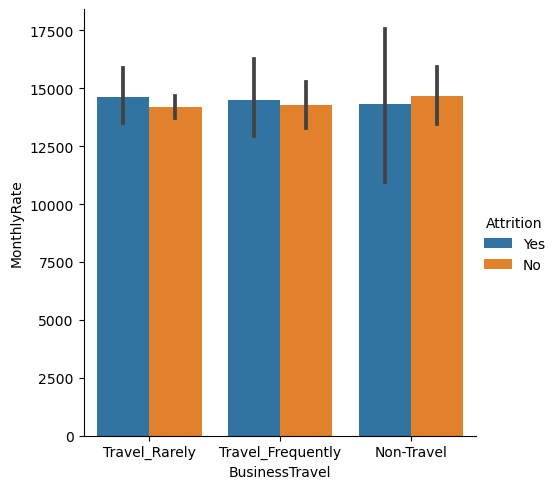

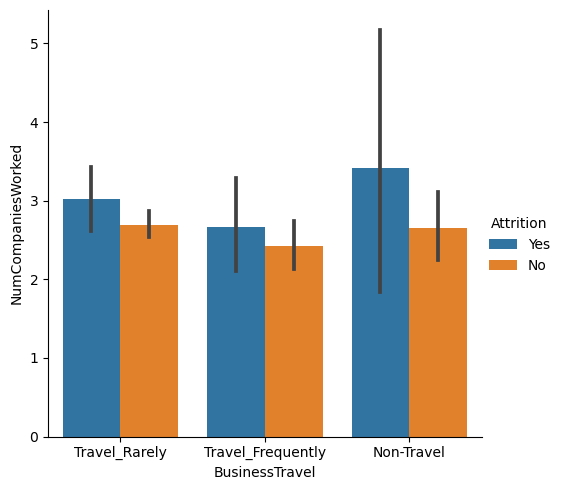

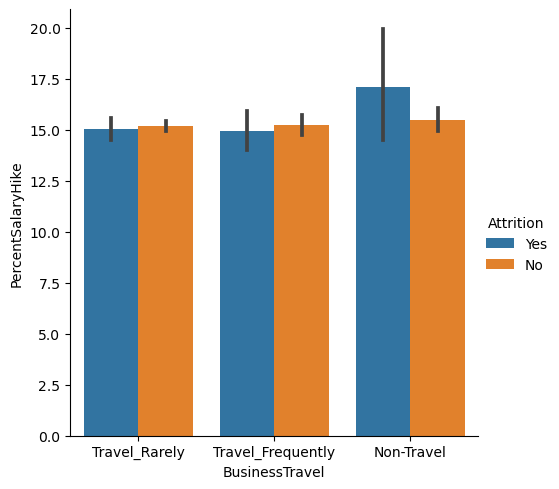

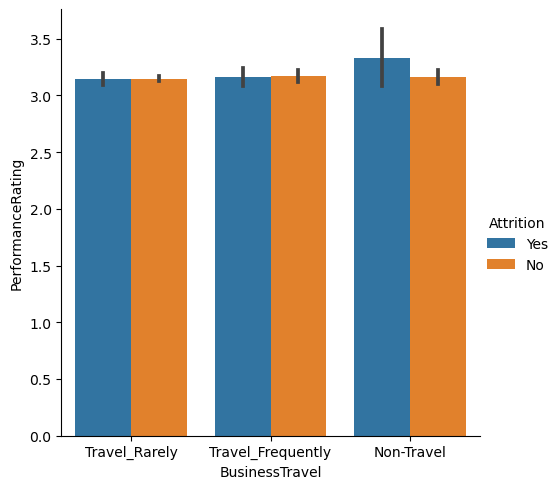

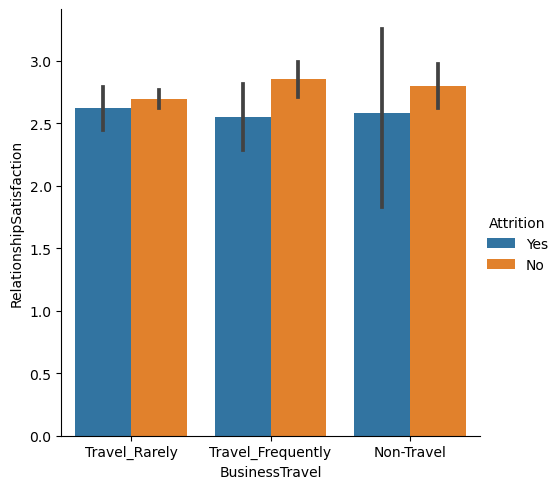

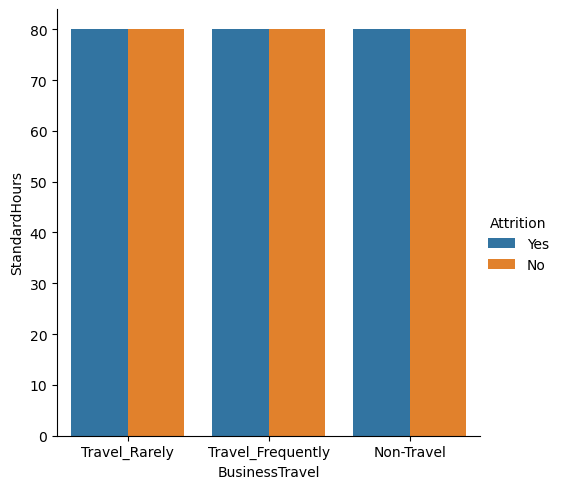

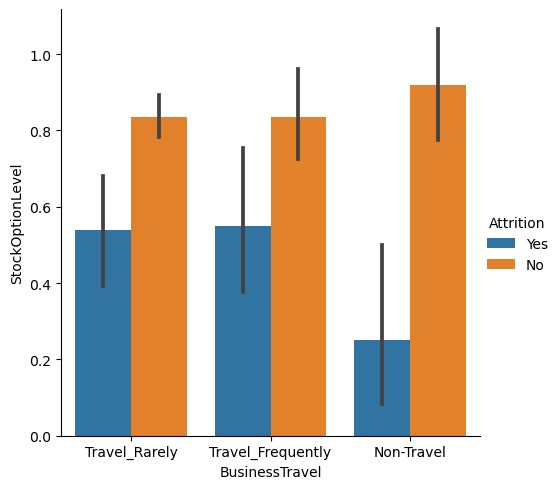

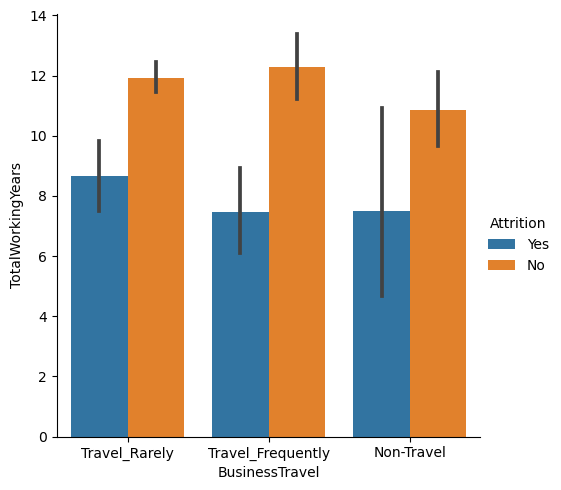

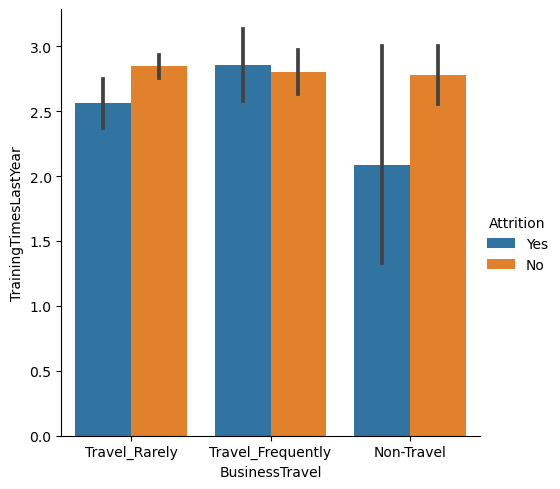

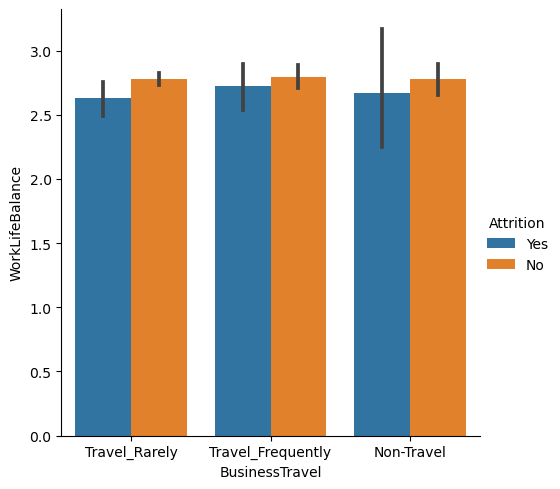

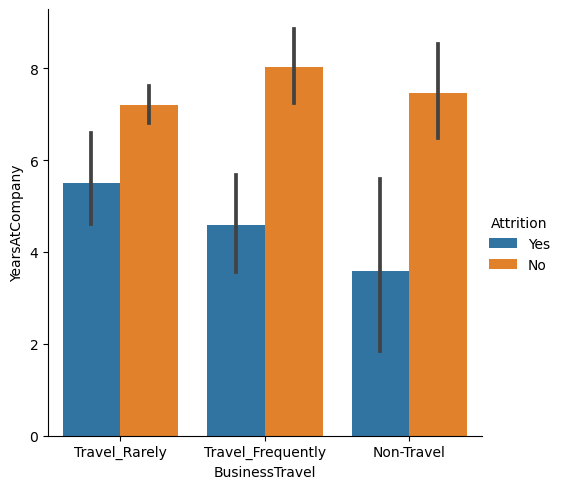

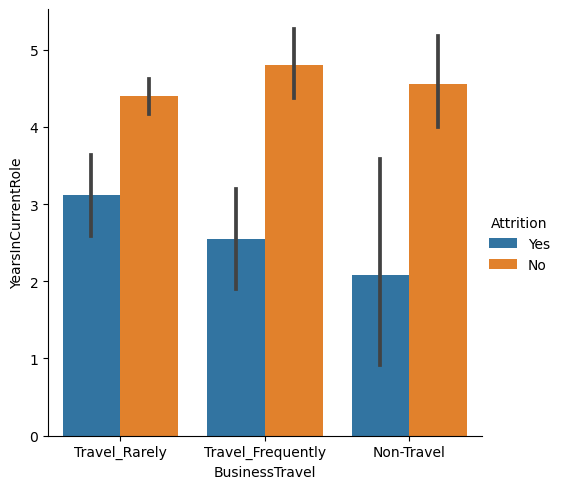

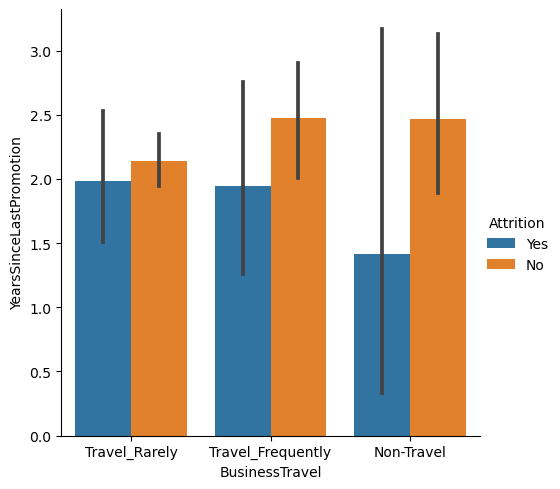

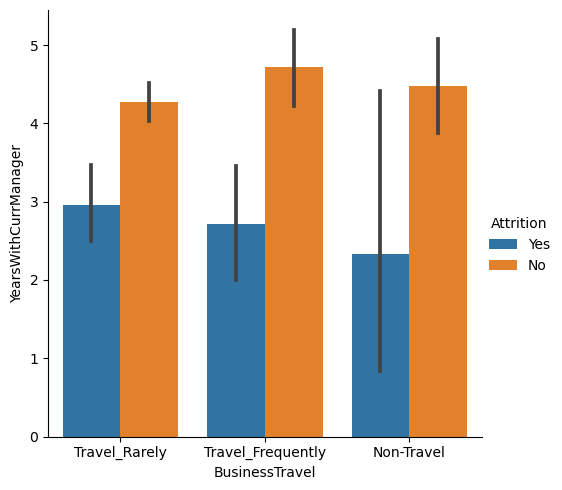

In [51]:
for i in df.columns:
    if df.dtypes[i]!='object':
        sns.catplot(kind='bar',x='BusinessTravel',y=i,data=df,hue='Attrition')
        plt.show()

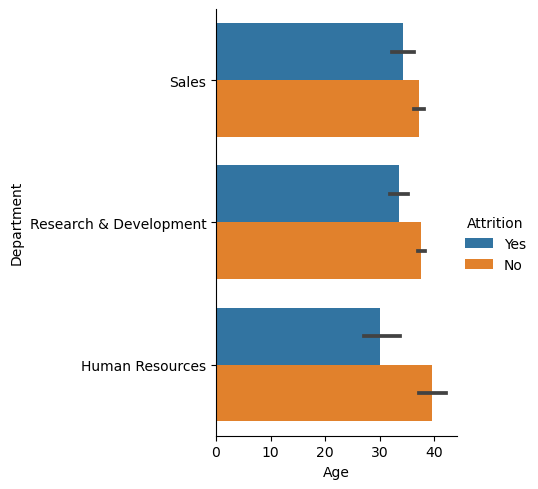

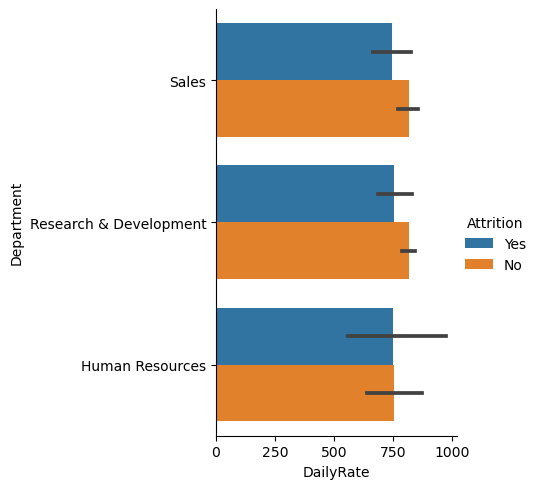

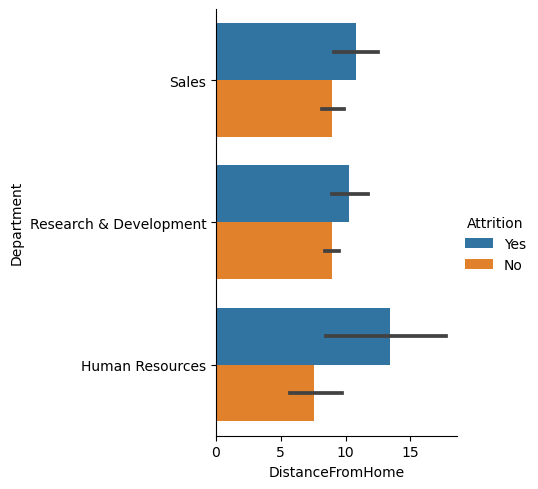

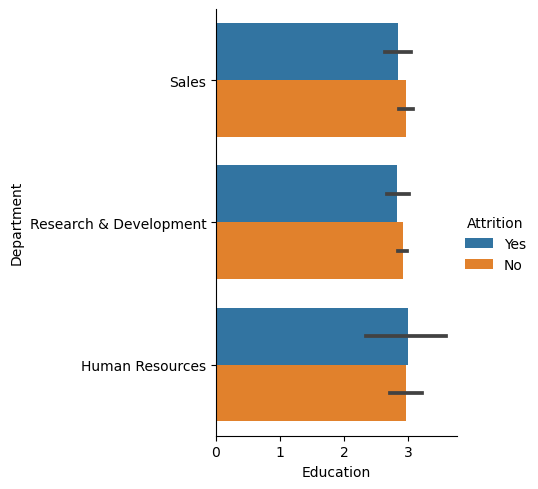

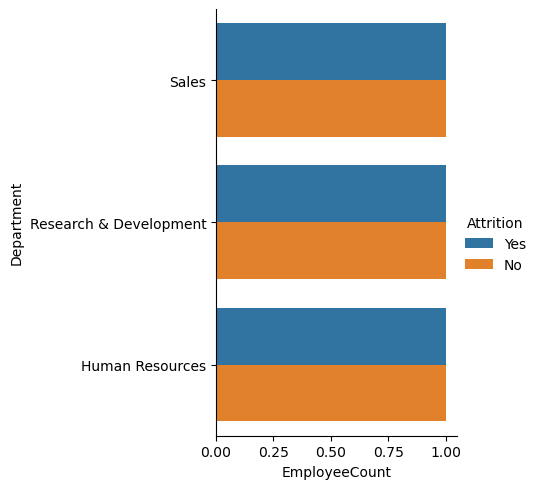

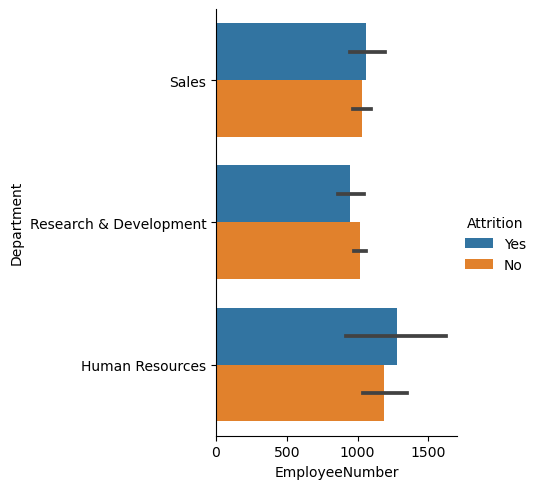

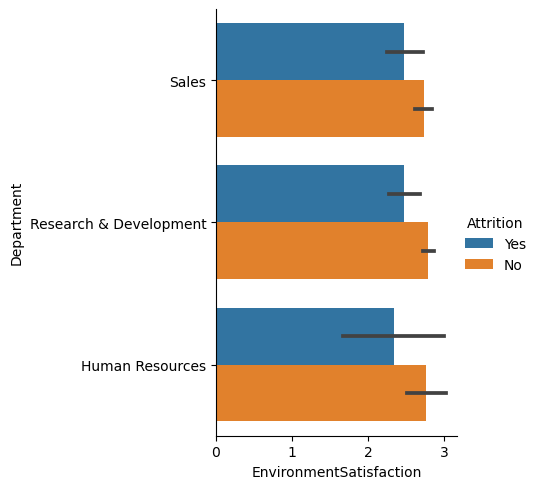

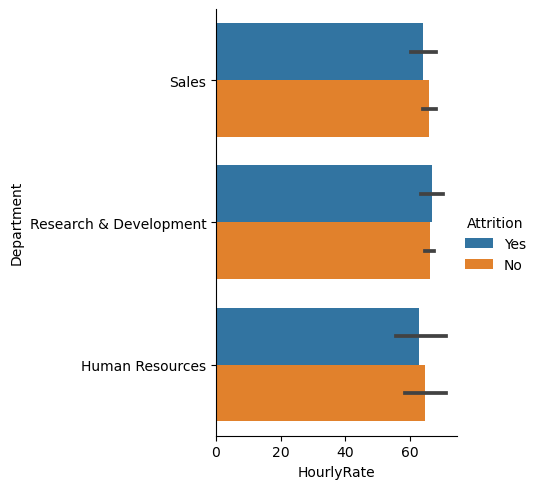

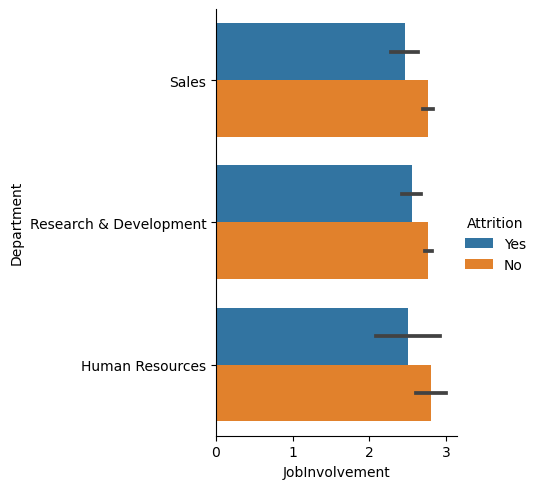

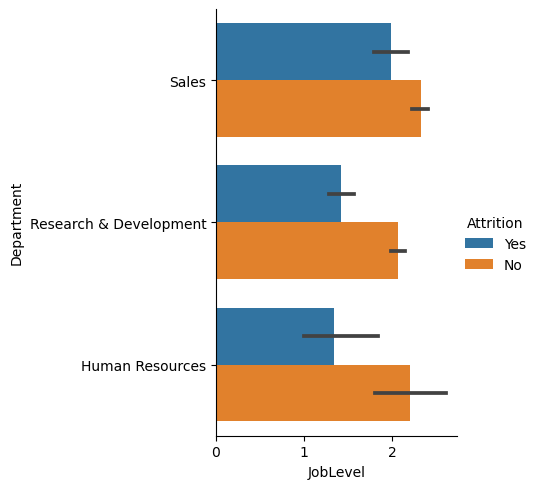

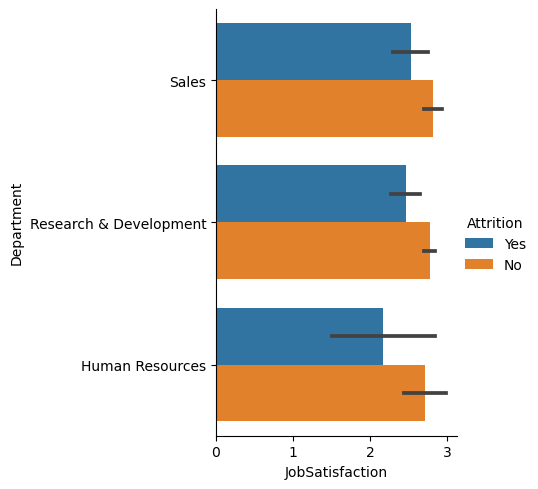

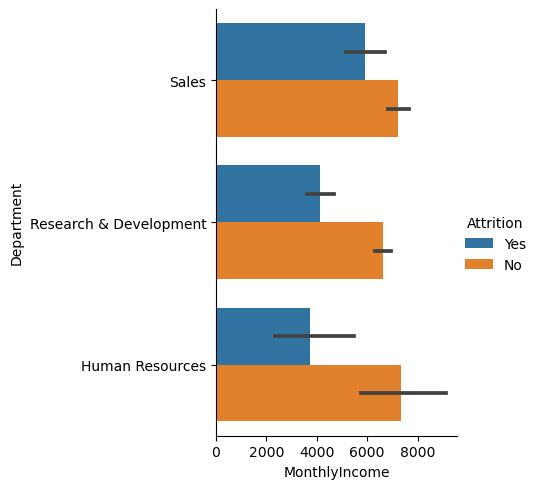

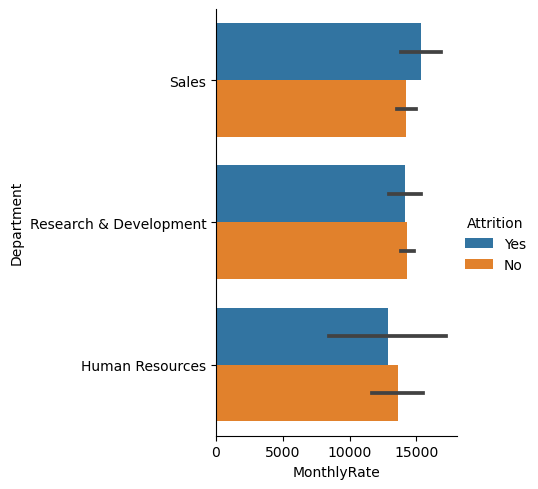

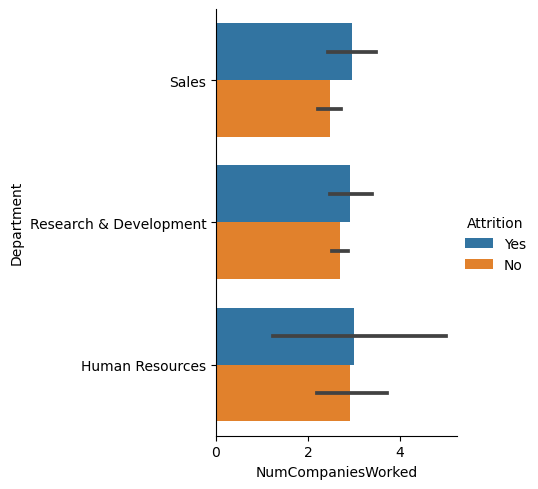

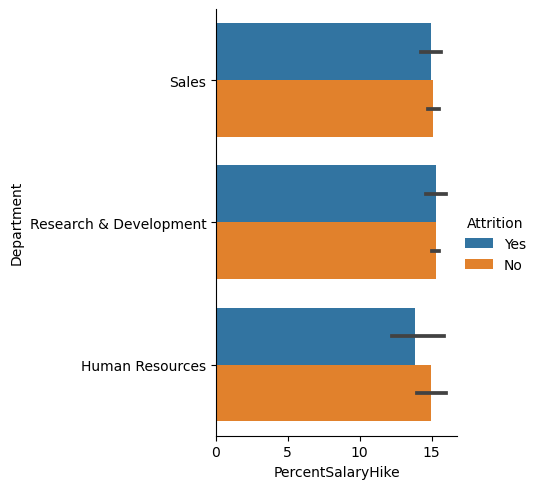

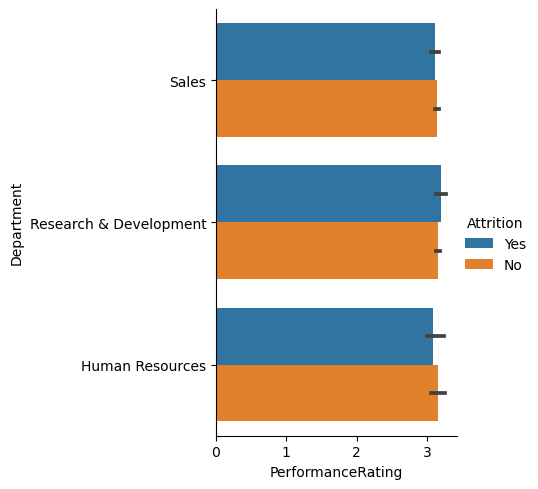

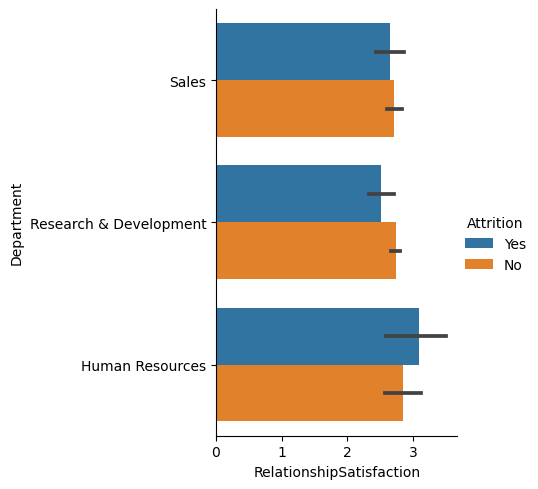

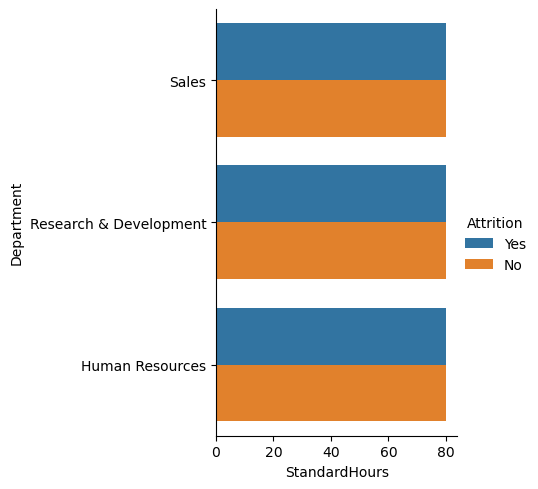

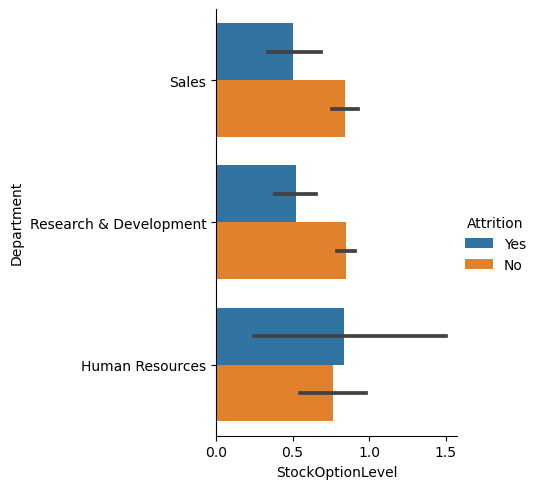

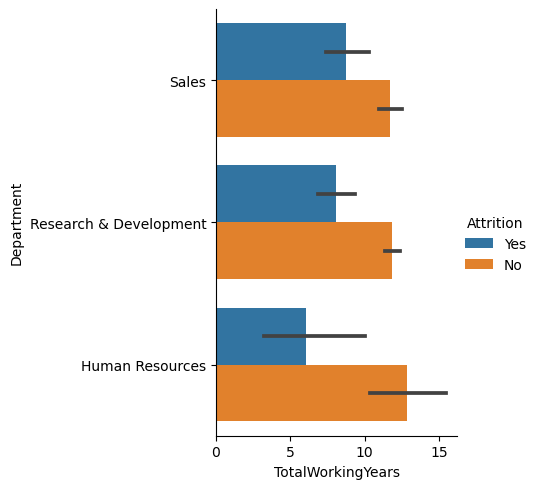

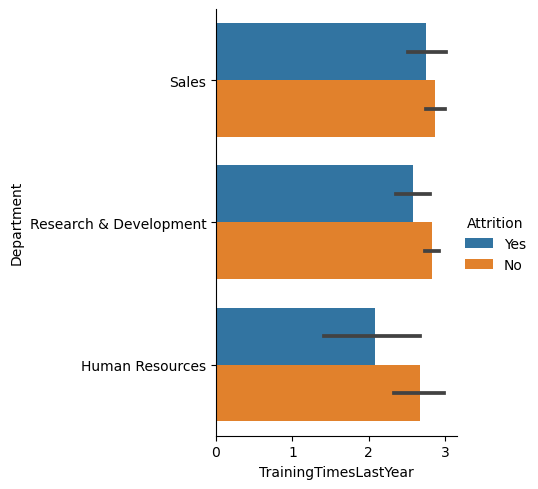

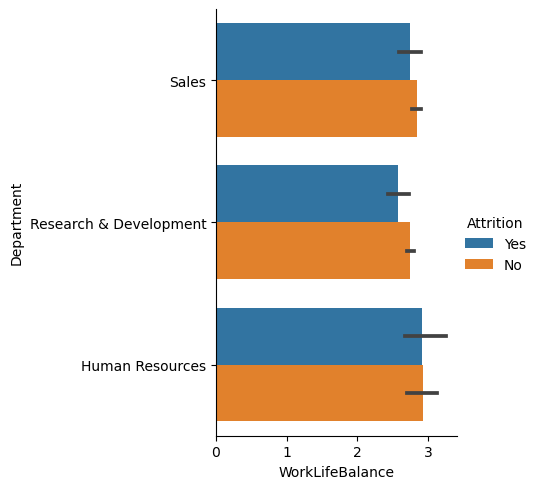

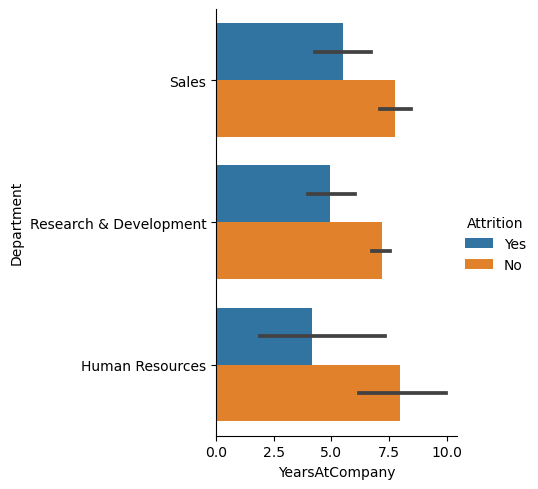

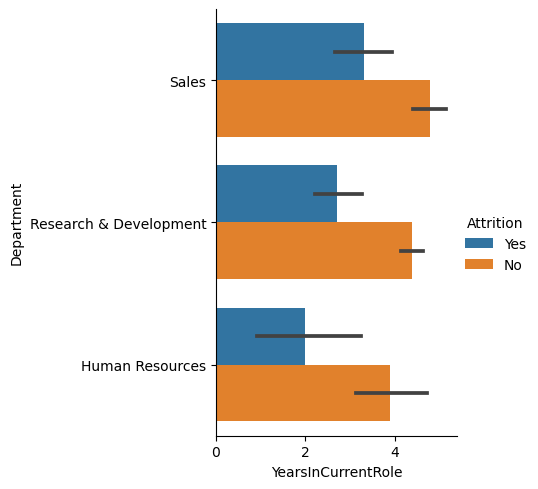

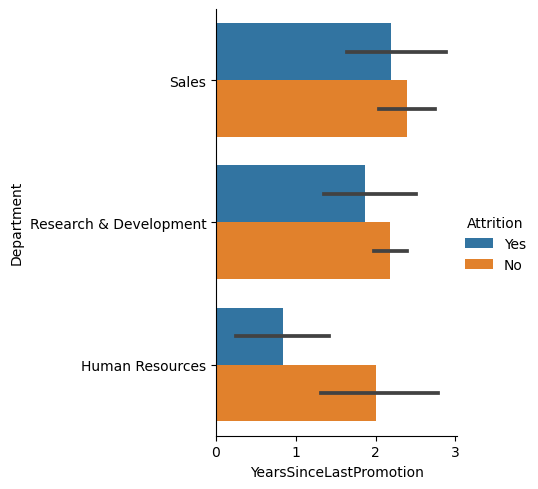

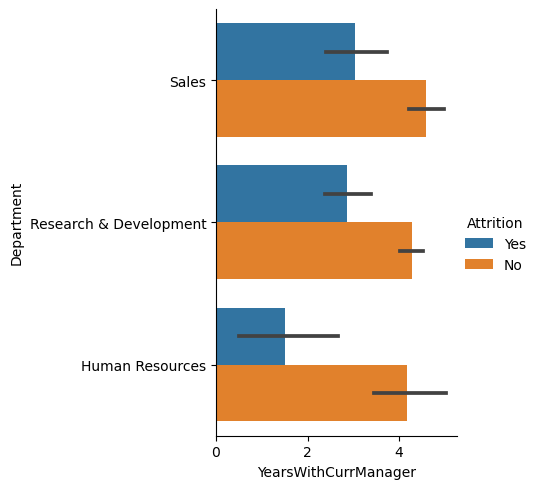

In [52]:
for i in df.columns:
    if df.dtypes[i]!='object':
        sns.catplot(kind='bar',y='Department',x=i,data=df,hue='Attrition')
        plt.show()

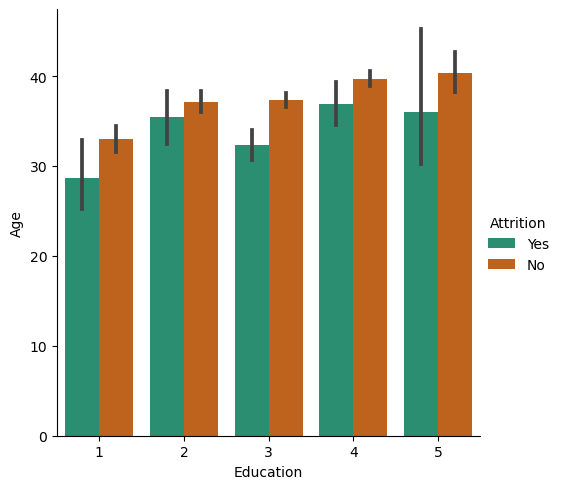

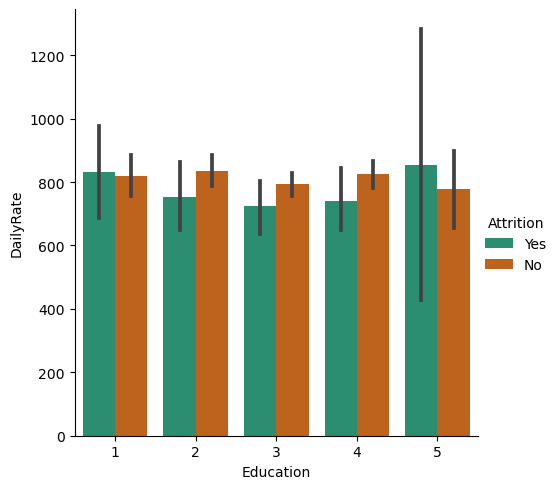

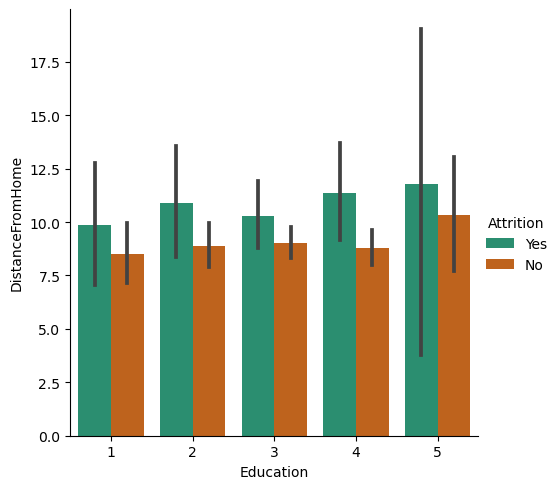

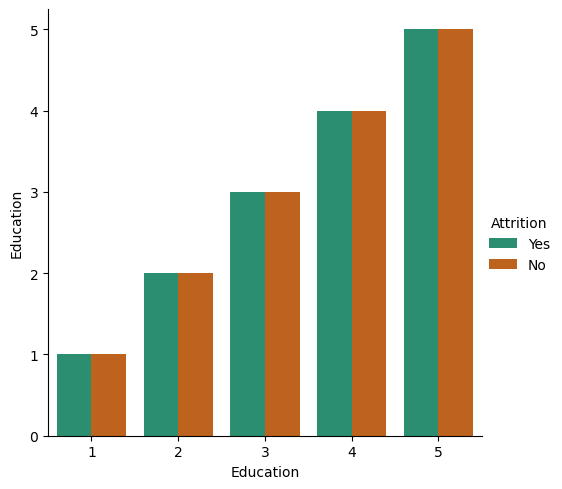

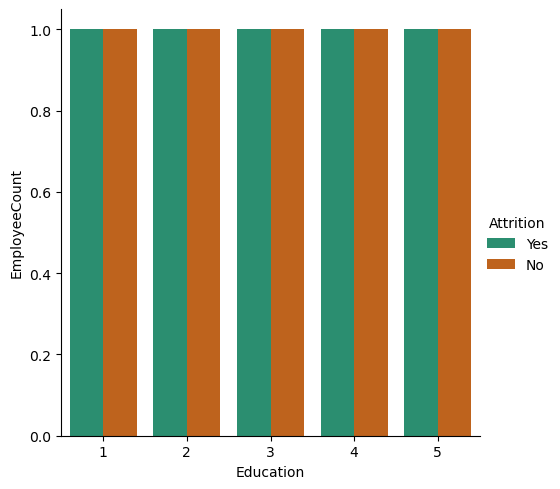

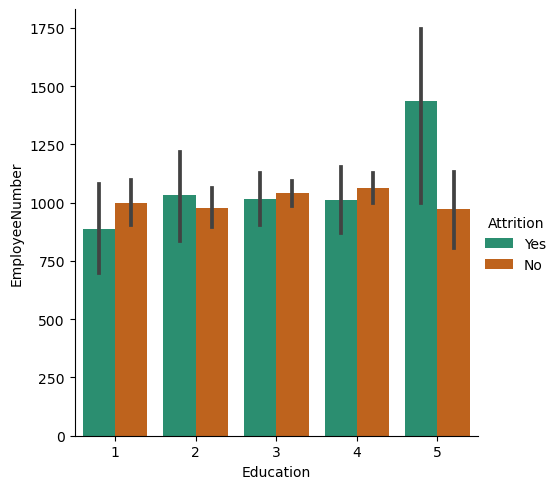

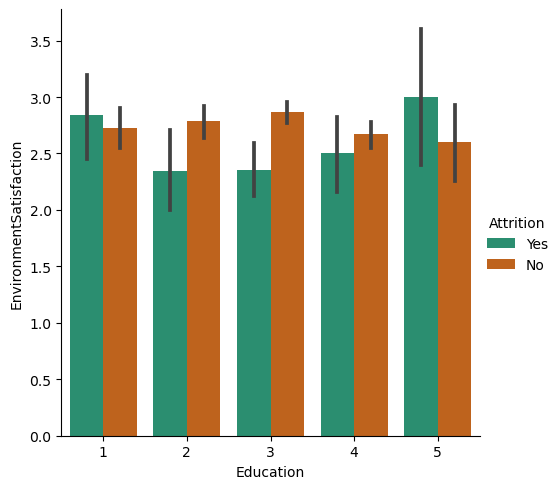

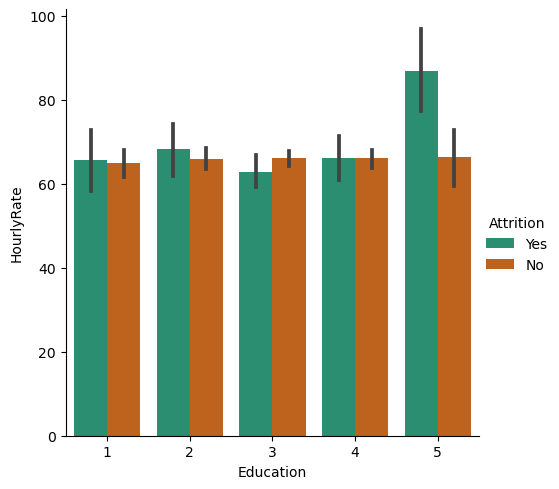

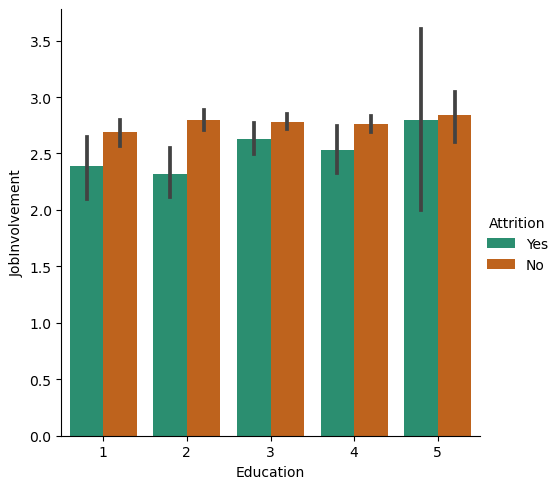

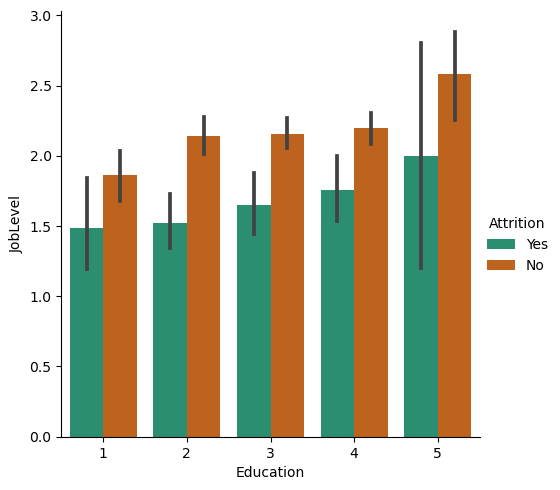

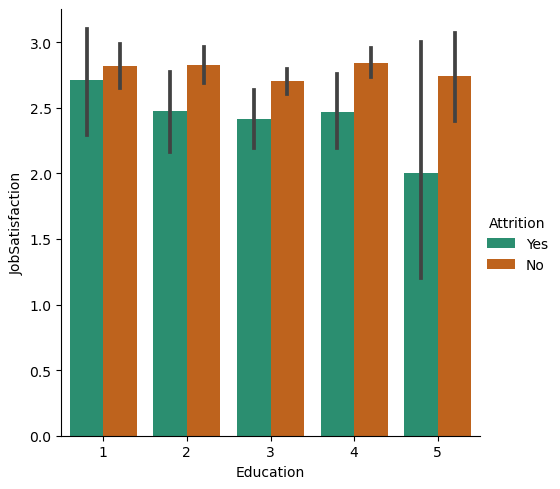

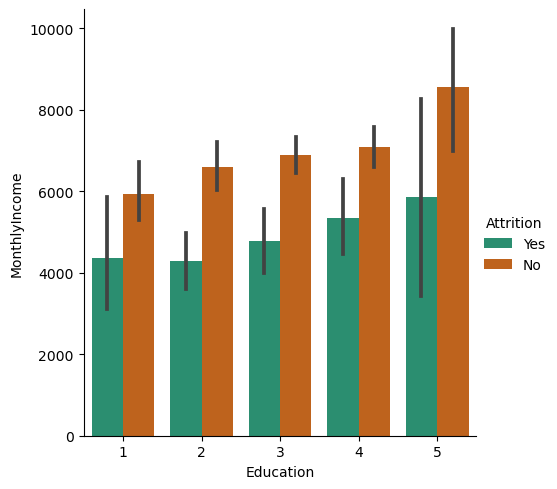

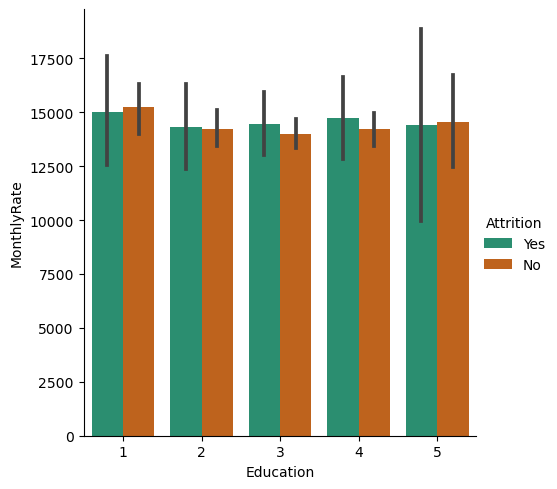

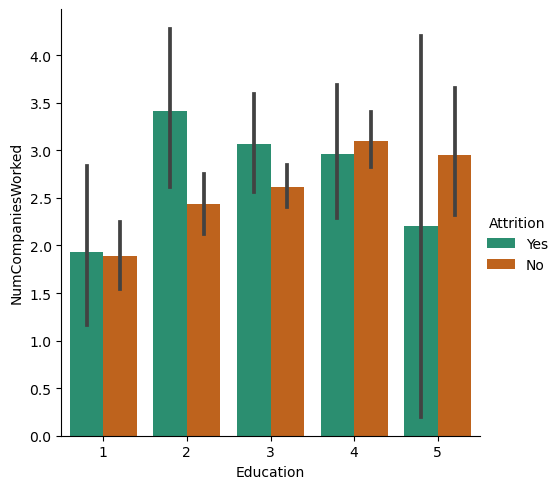

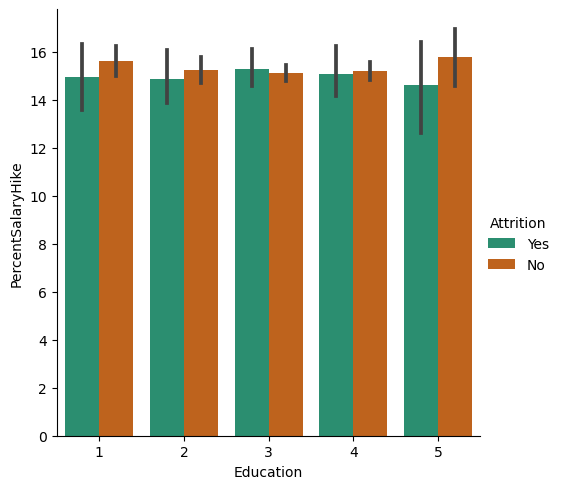

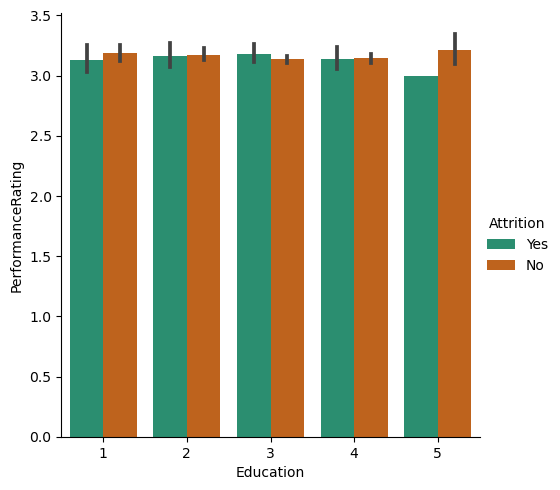

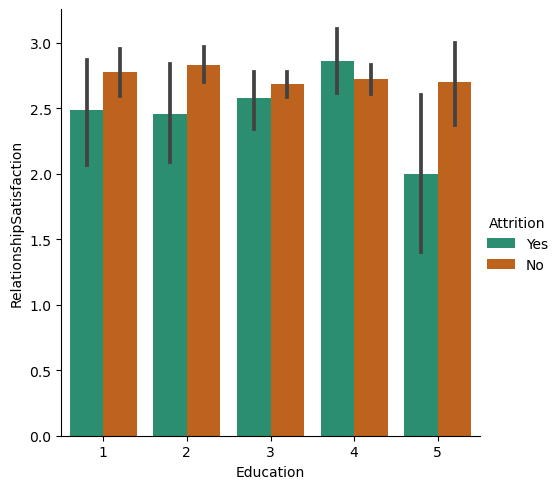

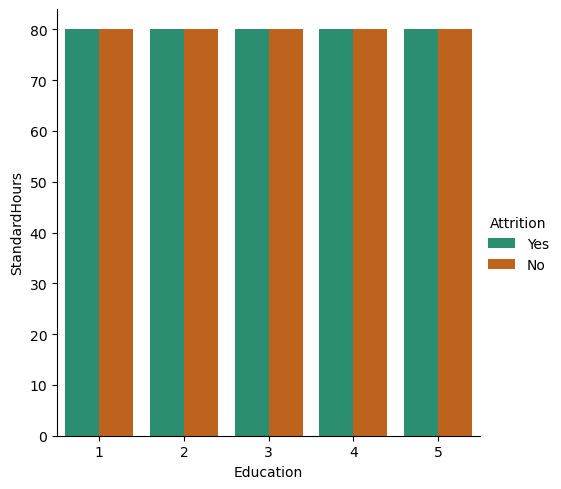

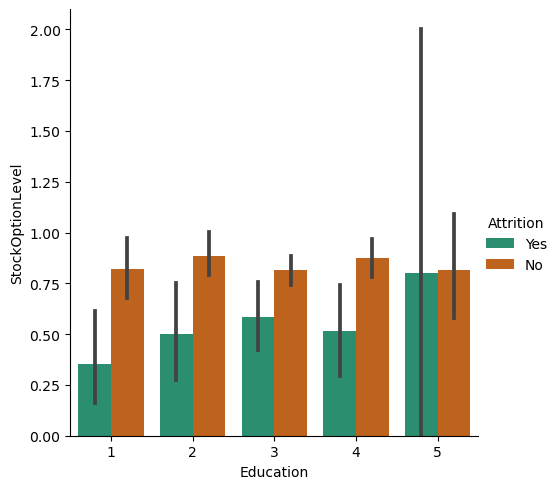

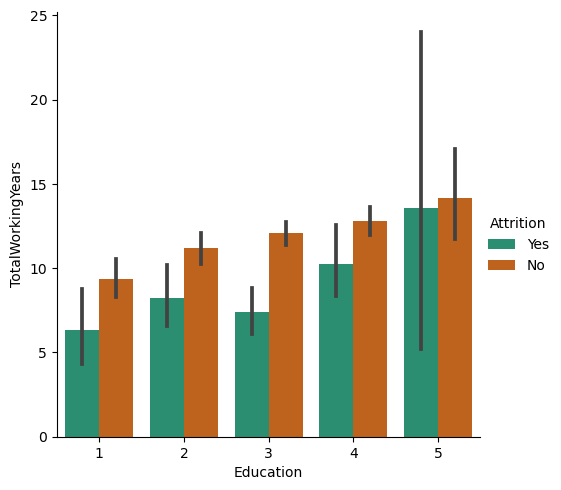

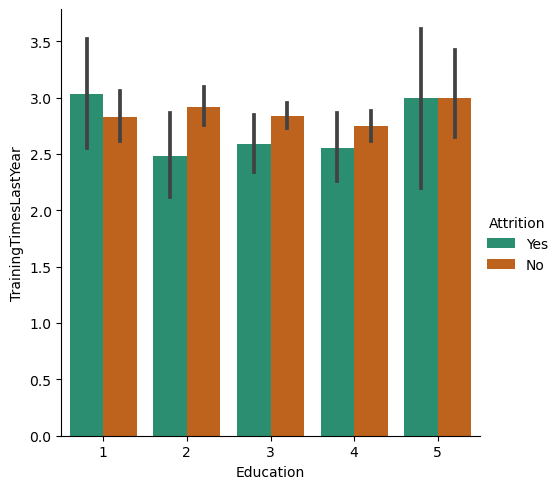

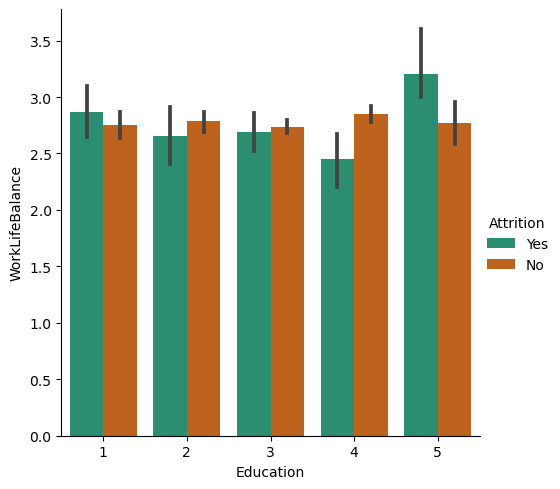

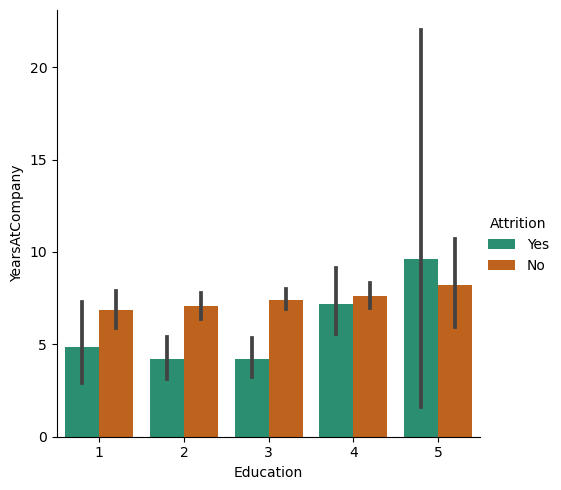

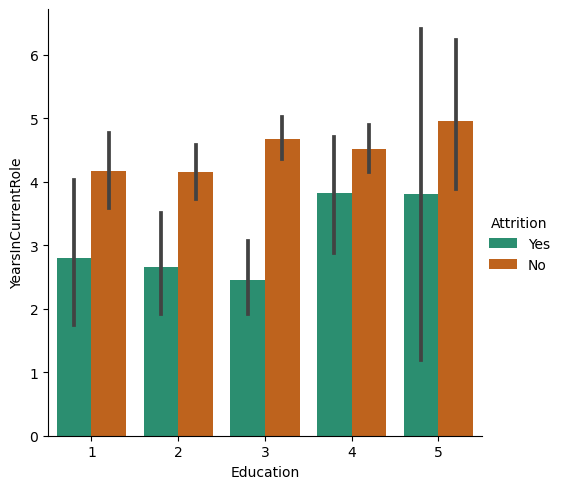

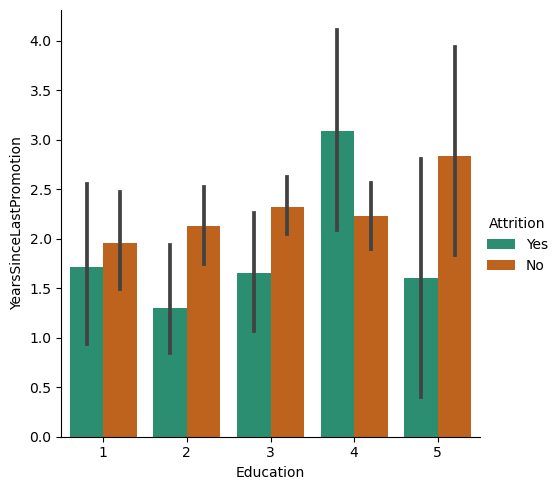

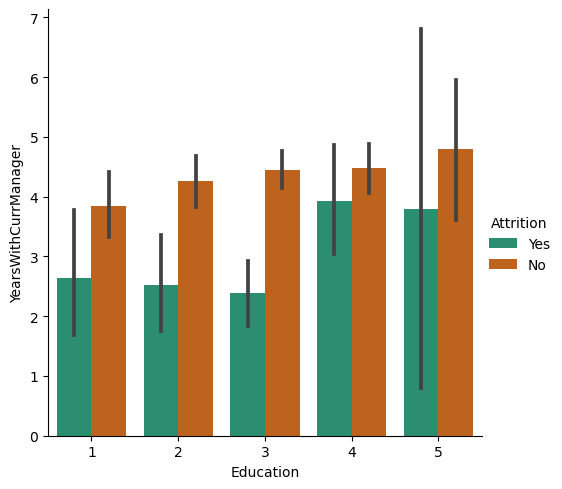

In [53]:
for i in df.columns:
    if df.dtypes[i]!='object':
        sns.catplot(kind='bar',x='Education',y=i,data=df,hue='Attrition',palette='Dark2')
        plt.show()

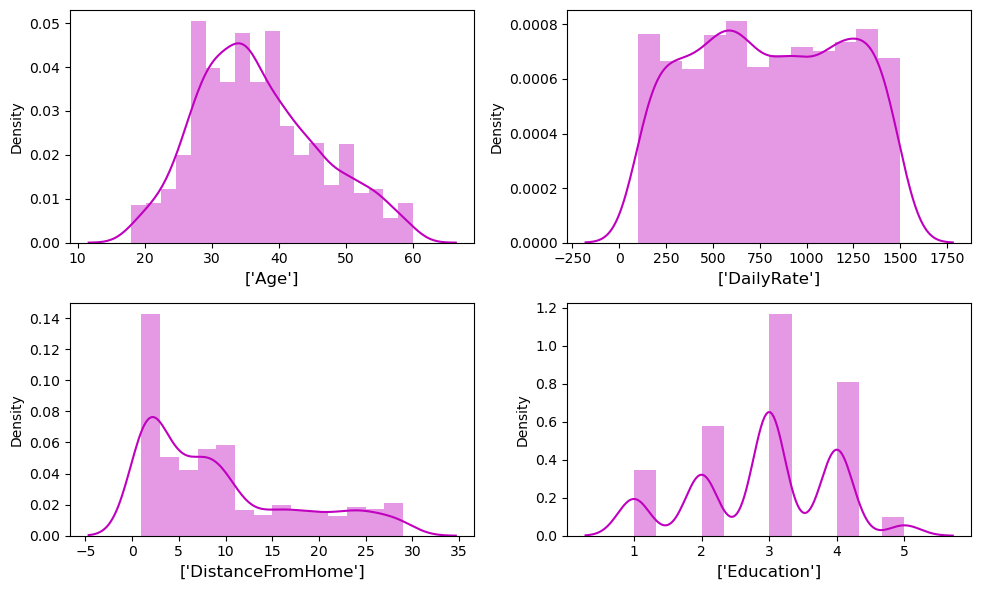

In [54]:
plt.figure(figsize=(10, 6),facecolor='white')
plotnumber=1
for col in numerical_columns:
    if plotnumber<=4:
        ax=plt.subplot(2, 2, plotnumber)
        sns.distplot(df[col], color = 'm')
        plt.xlabel(col, fontsize =12)
        plt.yticks(rotation=0,fontsize=10)

    plotnumber+=1
plt.tight_layout()
                        

In [55]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [56]:
df['Age']=np.sqrt(df['Age'])
df['DistanceFromHome']=np.sqrt(df['DistanceFromHome'])
df['Education']=np.sqrt(df['Education'])
df['EnvironmentSatisfaction']=np.sqrt(df['EnvironmentSatisfaction'])
df['JobLevel']=np.sqrt(df['JobLevel'])
df['MonthlyIncome']=np.sqrt(df['MonthlyIncome'])
df['NumCompaniesWorked']=np.sqrt(df['NumCompaniesWorked'])
df['PerformanceRating']=np.sqrt(df['PerformanceRating'])
df['TotalWorkingYears']=np.sqrt(df['TotalWorkingYears'])
df['YearsAtCompany']=np.sqrt(df['YearsAtCompany'])
df['YearsSinceLastPromotion']=np.sqrt(df['YearsSinceLastPromotion'])

In [57]:
df.skew()

Age                         0.141061
DailyRate                  -0.003519
DistanceFromHome            0.398114
Education                  -0.696432
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.569620
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.593923
JobSatisfaction            -0.329672
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          0.031303
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              0.426835
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     0.739126
YearsWithCurrManager        0.833451
dtype: float64

now it looks perfect

In [58]:
corr=df.corr()
corr

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010953         -0.012918   0.222045   
DailyRate                 0.010953   1.000000         -0.003880  -0.018910   
DistanceFromHome         -0.012918  -0.003880          1.000000   0.021789   
Education                 0.222045  -0.018910          0.021789   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.006091  -0.050990          0.035195   0.042716   
EnvironmentSatisfaction   0.007203   0.017602         -0.009611  -0.026703   
HourlyRate                0.025000   0.023381          0.023937   0.016197   
JobInvolvement            0.029619   0.046135          0.022151   0.045005   
JobLevel                  0.507394   0.002660          0.010562   0.109893   
JobSatisfaction          -0.004801   0.030571         -0.008417  -0.014952   
MonthlyIncome             0.504477   0.010362         -0.012811   0.106826   
MonthlyRate               0.023165  -0.032182          0.035661  -0.030590   
NumCompaniesWorked        0.311896   0.039496         -0.008815   0.133122   
PercentSalaryHike         0.002275   0.022704          0.036463  -0.014774   
PerformanceRating         0.000903   0.000473          0.018343  -0.026723   
RelationshipSatisfaction  0.050533   0.007846          0.008395  -0.009715   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.044662   0.042143          0.036655   0.019139   
TotalWorkingYears         0.689563   0.020250         -0.000272   0.166791   
TrainingTimesLastYear    -0.020492   0.002453         -0.026869  -0.026296   
WorkLifeBalance          -0.019944  -0.037848         -0.025353   0.006344   
YearsAtCompany            0.304845  -0.018989          0.008864   0.063349   
YearsInCurrentRole        0.223975   0.009932          0.012801   0.058800   
YearsSinceLastPromotion   0.200973  -0.038077          0.003526   0.038799   
YearsWithCurrManager      0.214396  -0.026363          0.014774   0.068530   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.006091   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.035195   
Education                           NaN        0.042716   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.013451   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.014876   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.010362   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN        0.005155   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.007360   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN        0.003559   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN        0.002747   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.007203    0.025000        0.029619   
DailyRate                                0.017602    0.023381        0.046135   
DistanceFromHome                        -0.009611    0.023937        0.022151   
Educat

here we need to drop the ('EmployeeCount') and ('StandardHours') let's do it

In [59]:
df=df.drop(['EmployeeCount','StandardHours'],axis=1)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0  6.403124       Yes      Travel_Rarely       1102                   Sales   
1  7.000000        No  Travel_Frequently        279  Research & Development   
2  6.082763       Yes      Travel_Rarely       1373  Research & Development   
3  5.744563        No  Travel_Frequently       1392  Research & Development   
4  5.196152        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0          1.000000   1.414214  Life Sciences               1   
1          2.828427   1.000000  Life Sciences               2   
2          1.414214   1.414214          Other               4   
3          1.732051   2.000000  Life Sciences               5   
4          1.414214   1.000000        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                 1.414214  ...          1.732051                         1   
1                 1.732051  ...          2.000000                         4   
2                 2.000000  ...          1.732051                         2   
3                 2.000000  ...          1.732051                         3   
4                 1.000000  ...          1.732051                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0           2.828427                     0                1   
1                 1           3.162278                     3                3   
2                 0           2.645751                     3                3   
3                 0           2.828427                     3                3   
4                 1           2.449490                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0       2.449490                   4                 0.000000   
1       3.162278                   7                 1.000000   
2       0.000000                   0                 0.000000   
3       2.828427                   7                 1.732051   
4       1.414214                   2                 1.414214   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 33 columns]

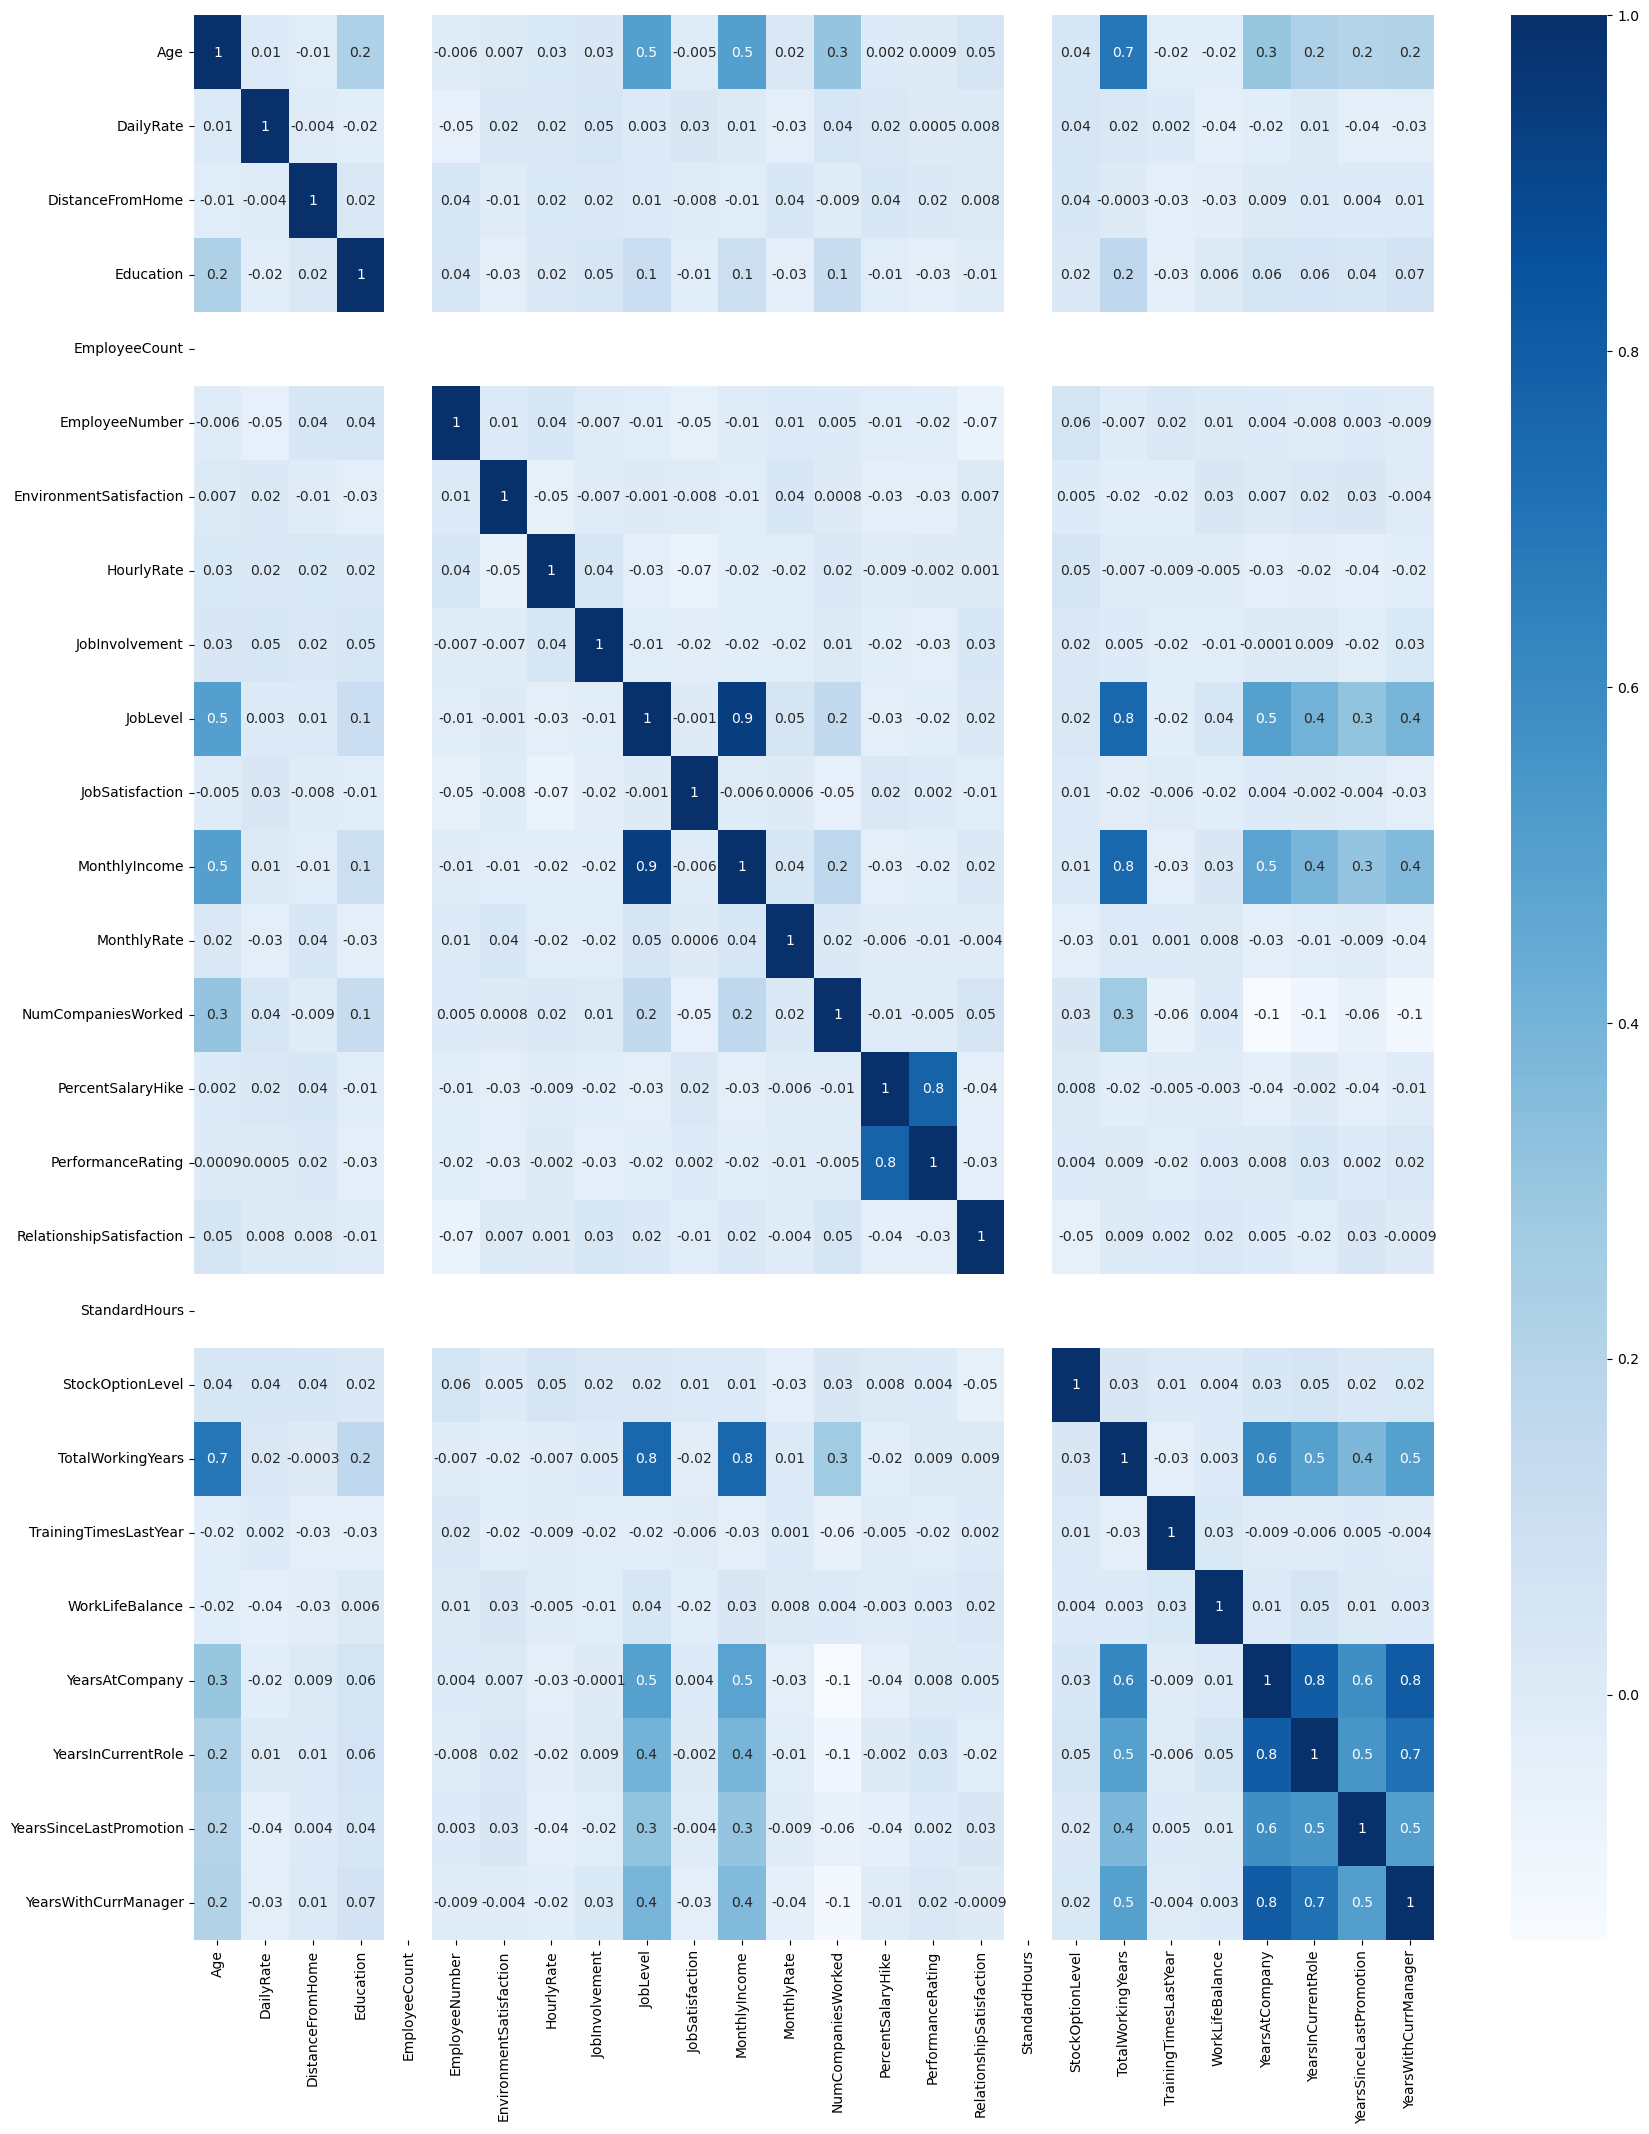

In [60]:
plt.figure(figsize=(20,25))
sns.heatmap(corr,cmap='Blues',annot=True,fmt='.1g')
plt.show()

# LabelEncoding using(LabelEncoder)

In [61]:
LE=LabelEncoder()
for i in df.columns:
    if df.dtypes[i]=='object':
        df[i]=LE.fit_transform(df[i].values.reshape(-1,1))
df

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     6.403124          1               2       1102           2   
1     7.000000          0               1        279           1   
2     6.082763          1               2       1373           1   
3     5.744563          0               1       1392           1   
4     5.196152          0               2        591           1   
...        ...        ...             ...        ...         ...   
1465  6.000000          0               1        884           1   
1466  6.244998          0               2        613           1   
1467  5.196152          0               2        155           1   
1468  7.000000          0               1       1023           2   
1469  5.830952          0               2        628           1   

      DistanceFromHome  Education  EducationField  EmployeeNumber  \
0             1.000000   1.414214               1               1   
1             2.828427   1.000000               1               2   
2             1.414214   1.414214               4               4   
3             1.732051   2.000000               1               5   
4             1.414214   1.000000               3               7   
...                ...        ...             ...             ...   
1465          4.795832   1.414214               3            2061   
1466          2.449490   1.000000               3            2062   
1467          2.000000   1.732051               1            2064   
1468          1.414214   1.732051               3            2065   
1469          2.828427   1.732051               3            2068   

      EnvironmentSatisfaction  ...  PerformanceRating  \
0                    1.414214  ...           1.732051   
1                    1.732051  ...           2.000000   
2                    2.000000  ...           1.732051   
3                    2.000000  ...           1.732051   
4                    1.000000  ...           1.732051   
...                       ...  ...                ...   
1465                 1.732051  ...           1.732051   
1466                 2.000000  ...           1.732051   
1467                 1.414214  ...           2.000000   
1468                 2.000000  ...           1.732051   
1469                 1.414214  ...           1.732051   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            1                 0           2.828427   
1                            4                 1           3.162278   
2                            2                 0           2.645751   
3                            3                 0           2.828427   
4                            4                 1           2.449490   
...                        ...               ...                ...   
1465                         3                 1           4.123106   
1466                         1                 1           3.000000   
1467                         2                 1           2.449490   
1468                         4                 0           4.123106   
1469                         1                 0           2.449490   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                         0                1        2.449490   
1                         3                3        3.162278   
2                         3                3        0.000000   
3                         3                3        2.828427   
4                         3                3        1.414214   
...                     ...              ...             ...   
1465                      3                3        2.236068   
1466                      5                3        2.645751   
1467                      0                3        2.449490   
1468                      3                2        3.000000   
1469                      3                4        2.000000   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWi

In [62]:
df.dtypes.to_list()

[dtype('float64'),
 dtype('int32'),
 dtype('int32'),
 dtype('int64'),
 dtype('int32'),
 dtype('float64'),
 dtype('float64'),
 dtype('int32'),
 dtype('int64'),
 dtype('float64'),
 dtype('int32'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int32'),
 dtype('int64'),
 dtype('int32'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int32'),
 dtype('int32'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64')]

as we can see now the datatype of all the features is numerical we have converted the categorical features into numerical features

# Separating the input and output variable

In [63]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

# Feature Scaling using (Standard Scaler)

In [64]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x),columns=x.columns)
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.498192        0.590048   0.742527    1.401512         -1.300333   
1     1.295602       -0.913194  -1.297775   -0.493817          0.077211   
2     0.070198        0.590048   1.414363   -0.493817         -0.988263   
3    -0.381628       -0.913194   1.461466   -0.493817         -0.748803   
4    -1.114289        0.590048  -0.524295   -0.493817         -0.988263   
...        ...             ...        ...         ...               ...   
1465 -0.040370       -0.913194   0.202082   -0.493817          1.559462   
1466  0.286940        0.590048  -0.469754   -0.493817         -0.208282   
1467 -1.114289        0.590048  -1.605183   -0.493817         -0.546929   
1468  1.295602       -0.913194   0.546677    1.401512         -0.988263   
1469 -0.266214        0.590048  -0.432568   -0.493817          0.077211   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  \
0     -0.802750       -0.937414       -1.701283                -0.542403   
1     -2.075710       -0.937414       -1.699621                 0.338745   
2     -0.802750        1.316673       -1.696298                 1.081586   
3      0.997488       -0.937414       -1.694636                 1.081586   
4     -2.075710        0.565311       -1.691313                -1.690737   
...         ...             ...             ...                      ...   
1465  -0.802750        0.565311        1.721670                 0.338745   
1466  -2.075710        0.565311        1.723332                 1.081586   
1467   0.174027       -0.937414        1.726655                -0.542403   
1468   0.174027        0.565311        1.728317                 1.081586   
1469   0.174027        0.565311        1.733302                -0.542403   

        Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0    -1.224745  ...          -0.426230                 -1.584178   
1     0.816497  ...           2.346151                  1.191438   
2     0.816497  ...          -0.426230                 -0.658973   
3    -1.224745  ...          -0.426230                  0.266233   
4     0.816497  ...          -0.426230                  1.191438   
...        ...  ...                ...                       ...   
1465  0.816497  ...          -0.426230                  0.266233   
1466  0.816497  ...          -0.426230                 -1.584178   
1467  0.816497  ...           2.346151                 -0.658973   
1468  0.816497  ...          -0.426230                  1.191438   
1469  0.816497  ...          -0.426230                 -1.584178   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -0.932014          -0.278944              -2.171982   
1             0.241988           0.008926               0.155707   
2            -0.932014          -0.436461               0.155707   
3            -0.932014          -0.278944               0.155707   
4             0.241988          -0.605693               0.155707   
...                ...                ...                    ...   
1465          0.241988           0.837424               0.155707   
1466          0.241988          -0.131001               1.707500   
1467          0.241988          -0.605693              -2.171982   
1468         -0.932014           0.837424               0.155707   
1469         -0.932014          -0.605693               0.155707   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.493820        0.040574           -0.063296   
1            0.338096        0.684253            0.764998   
2            0.338096       -2.171423           -1.167687   
3            0.338096        0.382771            0.764998   
4            0.338096       -0.894326           -0.615492   
...               ...             ...                 ...   
1465         0.338096       -0.152155           -0.615492   
1466         0.338096        0.217807            0.764998   
1467         0

In [65]:
vif=pd.DataFrame()
vif['Variables']=x.columns
vif['VIF VALUES']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Variables  VIF VALUES
0                        Age    2.113222
1             BusinessTravel    1.018568
2                  DailyRate    1.025720
3                 Department    1.961357
4           DistanceFromHome    1.016383
5                  Education    1.073254
6             EducationField    1.017739
7             EmployeeNumber    1.024091
8    EnvironmentSatisfaction    1.020905
9                     Gender    1.020641
10                HourlyRate    1.022204
11            JobInvolvement    1.018342
12                  JobLevel    9.827837
13                   JobRole    1.900677
14           JobSatisfaction    1.023437
15             MaritalStatus    1.850394
16             MonthlyIncome    9.413296
17               MonthlyRate    1.016924
18        NumCompaniesWorked    1.357110
19                    Over18         NaN
20                  OverTime    1.029124
21         PercentSalaryHike    2.529289
22         PerformanceRating    2.521836
23  RelationshipSatisfaction    1.026059
24          StockOptionLevel    1.824464
25         TotalWorkingYears    4.926124
26     TrainingTimesLastYear    1.022101
27           WorkLifeBalance    1.018816
28            YearsAtCompany    5.542026
29        YearsInCurrentRole    3.085967
30   YearsSinceLastPromotion    1.580401
31      YearsWithCurrManager    3.107534

here we need to drop ('JobLevel','Over18')

In [66]:
x=x.drop(['JobLevel','Over18'],axis=1)
x.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.498192        0.590048   0.742527    1.401512         -1.300333   
1  1.295602       -0.913194  -1.297775   -0.493817          0.077211   
2  0.070198        0.590048   1.414363   -0.493817         -0.988263   
3 -0.381628       -0.913194   1.461466   -0.493817         -0.748803   
4 -1.114289        0.590048  -0.524295   -0.493817         -0.988263   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  \
0  -0.802750       -0.937414       -1.701283                -0.542403   
1  -2.075710       -0.937414       -1.699621                 0.338745   
2  -0.802750        1.316673       -1.696298                 1.081586   
3   0.997488       -0.937414       -1.694636                 1.081586   
4  -2.075710        0.565311       -1.691313                -1.690737   

     Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0 -1.224745  ...          -0.426230                 -1.584178   
1  0.816497  ...           2.346151                  1.191438   
2  0.816497  ...          -0.426230                 -0.658973   
3 -1.224745  ...          -0.426230                  0.266233   
4  0.816497  ...          -0.426230                  1.191438   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0         -0.932014          -0.278944              -2.171982   
1          0.241988           0.008926               0.155707   
2         -0.932014          -0.436461               0.155707   
3         -0.932014          -0.278944               0.155707   
4          0.241988          -0.605693               0.155707   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0        -2.493820        0.040574           -0.063296   
1         0.338096        0.684253            0.764998   
2         0.338096       -2.171423           -1.167687   
3         0.338096        0.382771            0.764998   
4         0.338096       -0.894326           -0.615492   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                -0.989370              0.245834  
1                -0.038311              0.806541  
2                -0.989370             -1.155935  
3                 0.657912             -1.155935  
4                 0.355631             -0.595227  

[5 rows x 30 columns]

here we droped ('JobLevel','Over18')

In [67]:
vif=pd.DataFrame()
vif['variables']=x.columns
vif['VIF VALUES']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

variables  VIF VALUES
0                        Age    2.112646
1             BusinessTravel    1.015551
2                  DailyRate    1.025044
3                 Department    1.882119
4           DistanceFromHome    1.012405
5                  Education    1.073253
6             EducationField    1.016766
7             EmployeeNumber    1.023732
8    EnvironmentSatisfaction    1.019304
9                     Gender    1.020264
10                HourlyRate    1.019870
11            JobInvolvement    1.018215
12                   JobRole    1.880064
13           JobSatisfaction    1.023256
14             MaritalStatus    1.850392
15             MonthlyIncome    2.453504
16               MonthlyRate    1.016418
17        NumCompaniesWorked    1.355660
18                  OverTime    1.028609
19         PercentSalaryHike    2.528000
20         PerformanceRating    2.521620
21  RelationshipSatisfaction    1.026041
22          StockOptionLevel    1.824087
23         TotalWorkingYears    4.811675
24     TrainingTimesLastYear    1.021829
25           WorkLifeBalance    1.017376
26            YearsAtCompany    5.541816
27        YearsInCurrentRole    3.085897
28   YearsSinceLastPromotion    1.579453
29      YearsWithCurrManager    3.102803

now we can say this dataset is not creating the multicolinearity issue

In [68]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

target variable value is imbalanced we have to balanced it

In [69]:
smt=SMOTE()

In [70]:
x,y=smt.fit_resample(x,y)

In [71]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

here we have balanced the target variable using METHOD methos

# Modeling 

In [72]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    rfc_pred=rfc.predict(x_test)
    accu=accuracy_score(y_test,rfc_pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i


In [73]:
print('max accuracy',maxAccu, 'at this random_state', maxRS)

max accuracy 0.9581081081081081 at this random_state 9


# spliting the dataset

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Logistic Regression

In [75]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg_pred=lg.predict(x_test)
print('Accuracy score',accuracy_score(y_test,lg_pred))
print(confusion_matrix(y_test,lg_pred))
print(classification_report(y_test,lg_pred))

Accuracy score 0.7891891891891892
[[281  88]
 [ 68 303]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       369
           1       0.77      0.82      0.80       371

    accuracy                           0.79       740
   macro avg       0.79      0.79      0.79       740
weighted avg       0.79      0.79      0.79       740



# Decision Tree Classifier

In [76]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print('Accuracy score',accuracy_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

Accuracy score 0.8405405405405405
[[310  59]
 [ 59 312]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       369
           1       0.84      0.84      0.84       371

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.84      0.84      0.84       740



# SVC (support vector classifier)

In [77]:
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
print('Accuracy score',accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

Accuracy score 0.927027027027027
[[328  41]
 [ 13 358]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       369
           1       0.90      0.96      0.93       371

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740



# RandomForest Classifier

In [78]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print('Accuracy score',accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

Accuracy score 0.9567567567567568
[[361   8]
 [ 24 347]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       369
           1       0.98      0.94      0.96       371

    accuracy                           0.96       740
   macro avg       0.96      0.96      0.96       740
weighted avg       0.96      0.96      0.96       740



# ExtraTrees Classifier

In [79]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred=etc.predict(x_test)
print('accuracy score',accuracy_score(y_test,etc_pred))
print(confusion_matrix(y_test,etc_pred))
print(classification_report(y_test,etc_pred))

accuracy score 0.9756756756756757
[[356  13]
 [  5 366]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       369
           1       0.97      0.99      0.98       371

    accuracy                           0.98       740
   macro avg       0.98      0.98      0.98       740
weighted avg       0.98      0.98      0.98       740



# AdaBoost Classifier

In [80]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred=abc.predict(x_test)
print('Accuracy score',accuracy_score(y_test,abc_pred))
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))

Accuracy score 0.9
[[326  43]
 [ 31 340]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       369
           1       0.89      0.92      0.90       371

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740



# GradientBoosting Classifier

In [81]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred=gbc.predict(x_test)
print('Accuracy score',accuracy_score(y_test,gbc_pred))
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))


Accuracy score 0.9391891891891891
[[357  12]
 [ 33 338]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       369
           1       0.97      0.91      0.94       371

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740



# Cross validation score

In [82]:
score1=cross_val_score(lg,x,y,cv=5)
print(score1)
print(score1.mean())
print('difference between the cross validation and accuracy score',(accuracy_score(y_test,lg_pred)-score1.mean()*100))

[0.67611336 0.74442191 0.79107505 0.78701826 0.7464503 ]
0.7490157755130532
difference between the cross validation and accuracy score -74.11238836211614


In [83]:
score2=cross_val_score(dtc,x,y)
print(score2)
print(score2.mean())
print('difference between the cross validation and the accuracy score',(accuracy_score(y_test,dtc_pred)-score2.mean()*100))

[0.67004049 0.83772819 0.71399594 0.81135903 0.55780933]
0.7181865961517933
difference between the cross validation and the accuracy score -70.97811907463878


In [84]:
score3=cross_val_score(svc,x,y)
print(score3)
print(score3.mean())
print('difference between the cross validation score and accuracy score',(accuracy_score(y_test,svc_pred)-score3.mean()*100))

[0.87651822 0.9188641  0.92089249 0.90466531 0.88032454]
0.9002529337855483
difference between the cross validation score and accuracy score -89.0982663515278


In [85]:
score4=cross_val_score(rfc,x,y)
print(score4)
print(score4.mean())
print('difference between cross validation score and accuracy score',(accuracy_score(y_test,rfc_pred)-score4.mean()*100))

[0.77935223 0.96957404 0.95943205 0.94117647 0.5841785 ]
0.8467426562974765
difference between cross validation score and accuracy score -83.71750887299089


In [86]:
score5=cross_val_score(etc,x,y)
print(score5)
print(score5.mean())
print('difference between the cross validation and accuracy score',(accuracy_score(y_test,etc_pred)-score5.mean()*100))

[0.93319838 0.97363083 0.97160243 0.96551724 0.97363083]
0.9635159438618391
difference between the cross validation and accuracy score -95.37591871050824


In [87]:
score6=cross_val_score(abc,x,y)
print(score6)
print(score6.mean())
print('difference between the cross validation score and accuracy score',(accuracy_score(y_test,abc_pred)-score6.mean()*100))

[0.52024291 0.83772819 0.78498986 0.73833671 0.48884381]
0.6740282990202922
difference between the cross validation score and accuracy score -66.5028299020292


In [88]:
score7=cross_val_score(gbc,x,y)
print(score7)
print(score7.mean())
print('difference between the cross validation score and accuracy score',(accuracy_score(y_test,gbc_pred)-score7.mean()*100))

[0.58502024 0.90466531 0.89249493 0.81947262 0.53752535]
0.7478356915850244
difference between the cross validation score and accuracy score -73.84437996931325


as we can see ExtraTreesClassifier is giving high accuracy score this it the best model for our dataset

# HyperParameter tunning

In [89]:
param={'criterion':['gini','entropy','log_loss'],
      'n_estimators':[100,150,200,250,300],
      'max_depth':[1,3,5,7,4]}
model=ExtraTreesClassifier()

In [90]:
grid=GridSearchCV(model,param)


In [91]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5, 7, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [93]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 300}

In [96]:
final_model1=ExtraTreesClassifier(criterion='entropy',max_depth=5,n_estimators=250)
final_model1.fit(x_train,y_train)
pred=final_model1.predict(x_test)
print('Accuracy score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score 0.8405405405405405
[[308  61]
 [ 57 314]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       369
           1       0.84      0.85      0.84       371

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.84      0.84      0.84       740



In [97]:
Final_model2=ExtraTreesClassifier(criterion='gini',max_depth=7,n_estimators=300)
Final_model2.fit(x_train,y_train)
pred1=Final_model2.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

Accuracy_score 0.9027027027027027
[[326  43]
 [ 29 342]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       369
           1       0.89      0.92      0.90       371

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740



as we can see the parameters given by the HyperParameter tunning our final_model2 is performing well so this is our best and final model

# Saving model

In [98]:
import joblib

In [99]:
joblib.dump(Final_model2,'HR analysis.pkl')

['HR analysis.pkl']

In [100]:
model=joblib.load('HR analysis.pkl')
output=model.predict(x_test)
output

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [101]:
a=np.array(y_test)
df=pd.DataFrame()
df['output']=output
df['original']=a
df


output  original
0         0         0
1         0         1
2         1         1
3         0         0
4         0         0
..      ...       ...
735       0         0
736       1         1
737       1         1
738       1         1
739       1         1

[740 rows x 2 columns]